In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('import/four_seasons.csv')
data.set_index('Player', inplace=True)

data

Salary Pos   Age  G_19  GS_19  MP_19  FG_19  \
Player                                                                       
Stephen Curry\curryst01      43006362  PG  31.0   5.0    5.0   27.8    6.6   
Russell Westbrook\westbru01  41358814  PG  31.0  57.0   57.0   35.9   10.6   
Chris Paul\paulch01          41358814  PG  34.0  70.0   70.0   31.5    6.2   
John Wall\walljo01           41254920  PG  29.0   0.0    0.0    0.0    0.0   
James Harden\hardeja01       40824000  SG  30.0  68.0   68.0   36.5    9.9   
...                               ...  ..   ...   ...    ...    ...    ...   
Wayne Ellington\ellinwa01      440472  SG  32.0  36.0    1.0   15.5    1.7   
A.J. Hammons\hammoaj01         350087   C   0.0   0.0    0.0    0.0    0.0   
Rayjon Tucker\tuckera01        340000  SG  22.0  20.0    0.0    8.1    1.0   
Troy Williams\willitr02        122741  SF  25.0   0.0    0.0    0.0    0.0   
Demetrius Jackson\jacksde01     92857  PG  25.0   0.0    0.0    0.0    0.0   

                             FGA_19  FG%_19  3P_19  ...  FT%_16  ORB_16  \
Player                                              ...                   
Stephen Curry\curryst01        16.4   0.402    2.4  ...   0.898     0.8   
Russell Westbrook\westbru01    22.5   0.472    1.0  ...   0.845     1.7   
Chris Paul\paulch01            12.7   0.489    1.6  ...   0.892     0.7   
John Wall\walljo01              0.0   0.000    0.0  ...   0.801     0.8   
James Harden\hardeja01         22.3   0.444    4.4  ...   0.847     1.2   
...                             ...     ...    ...  ...     ...     ...   
Wayne Ellington\ellinwa01       4.8   0.351    1.4  ...   0.860     0.3   
A.J. Hammons\hammoaj01          0.0   0.000    0.0  ...   0.450     0.4   
Rayjon Tucker\tuckera01         2.2   0.465    0.2  ...   0.000     0.0   
Troy Williams\willitr02         0.0   0.000    0.0  ...   0.656     0.5   
Demetrius Jackson\jacksde01     0.0   0.000    0.0  ...   0.500     0.4   

                             DRB_16  TRB_16  AST_16  STL_16  BLK_16  TOV_16  \
Player                                                                        
Stephen Curry\curryst01         3.7     4.5     6.6     1.8     0.2     3.0   
Russell Westbrook\westbru01     9.0    10.7    10.4     1.6     0.4     5.4   
Chris Paul\paulch01             4.3     5.0     9.2     2.0     0.1     2.4   
John Wall\walljo01              3.4     4.2    10.7     2.0     0.6     4.1   
James Harden\hardeja01          7.0     8.1    11.2     1.5     0.5     5.7   
...                             ...     ...     ...     ...     ...     ...   
Wayne Ellington\ellinwa01       1.8     2.1     1.1     0.6     0.1     0.5   
A.J. Hammons\hammoaj01          1.3     1.6     0.2     0.0     0.6     0.5   
Rayjon Tucker\tuckera01         0.0     0.0     0.0     0.0     0.0     0.0   
Troy Williams\willitr02         1.8     2.3     0.8     0.9     0.3     1.1   
Demetrius Jackson\jacksde01     0.4     0.8     0.6     0.0     0.0     0.0   

                             PF_16  PTS_16  
Player                                      
Stephen Curry\curryst01        2.3    25.3  
Russell Westbrook\westbru01    2.3    31.6  
Chris Paul\paulch01            2.4    18.1  
John Wall\walljo01             1.9    23.1  
James Harden\hardeja01         2.7    29.1  
...                            ...     ...  
Wayne Ellington\ellinwa01      1.1    10.5  
A.J. Hammons\hammoaj01         1.0     2.2  
Rayjon Tucker\tuckera01        0.0     0.0  
Troy Williams\willitr02        2.0     6.2  
Demetrius Jackson\jacksde01    0.0     2.0  

[428 rows x 103 columns]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
strong_corr_labels = data.corr()[data.corr()['Salary'] > 0.65].index

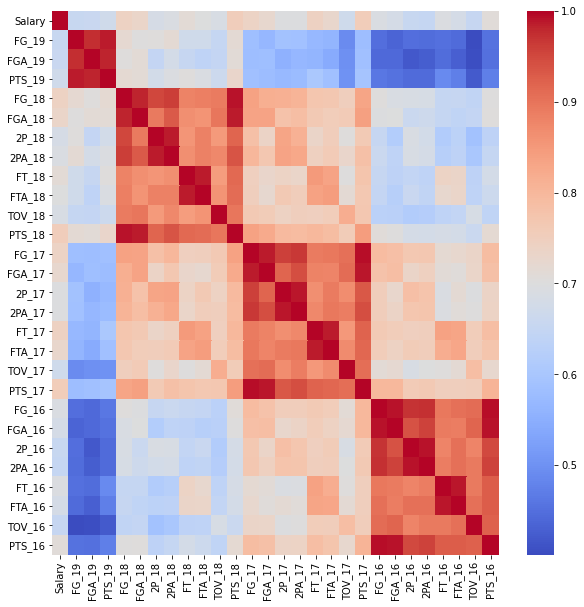

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(data[strong_corr_labels].corr(), cmap='coolwarm')
plt.show()

In [9]:
reduced_data = data.copy()

In [10]:
low_corr_cols = reduced_data.drop('Salary', axis=True).columns
low_corr = abs(reduced_data.corr()) < 0.91
for i in low_corr.columns:
    for j in low_corr.columns:
        if i != j and low_corr[i][j] == False and j in low_corr_cols:
            low_corr_cols = low_corr_cols.drop(j)

len(low_corr_cols)

36

In [0]:
#export_file_path = 'export/four_seasons_low_corr.csv'
#reduced_data[cols].to_csv(export_file_path, header=True)

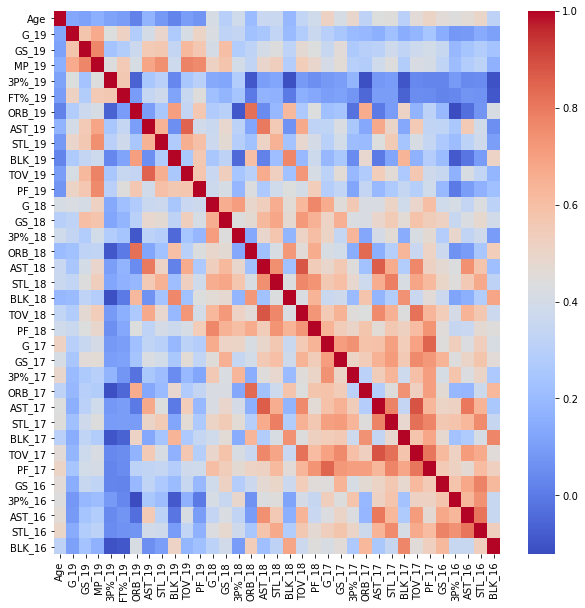

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(reduced_data[low_corr_cols].corr(), cmap='coolwarm')
plt.show()

In [12]:
from IPython.display import display, Markdown

In [13]:
def default_analysis_for_numeric_feature(features, target):
    N = len(features)
    name = features[0].name.split('_')[0]
    
    display(Markdown(f'# *{name}*'))
   
    fig, axes = plt.subplots(2, 1, figsize=(10, 4))
    sns.barplot(ax=axes[0], x=[feature.name for feature in features], y=[target.corr(feature) for feature in features])
    sns.barplot(ax=axes[1], x=[feature.name for feature in features], y=[feature[feature!=0].mean() for feature in features])
    axes[0].set_ylabel('Correlation')
    axes[1].set_ylabel('Mean')
    plt.show()

    fig, axes = plt.subplots(N, 2, figsize=(10, N*3))
    for i in range(N):        
        sns.histplot(ax=axes[i, 0], data=features[i][features[i]!=0], kde=False, bins=10)
        sns.regplot(ax=axes[i, 1], x=features[i][features[i]!=0], y=target[features[i]!=0], ci=False)
    plt.tight_layout()
    plt.show()

## Most correlated features

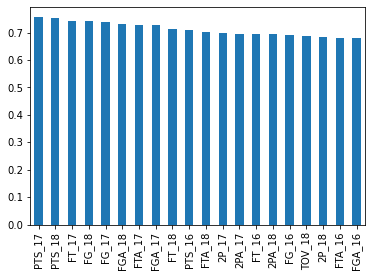

In [14]:
most_corr_features = data.corr()['Salary'].drop('Salary').sort_values(ascending=False).head(20)
most_corr_features.plot.bar()

plt.show()

## Salary

In [0]:
#sns.displot(data['Salary'])
#plt.show()

In [0]:
## Numerical features analysis

# *BLK*

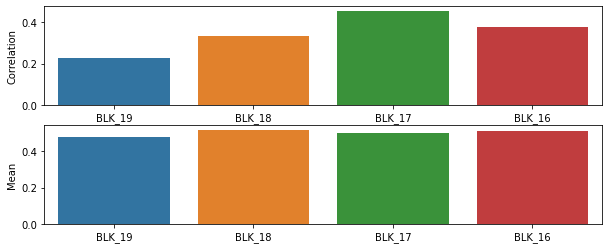

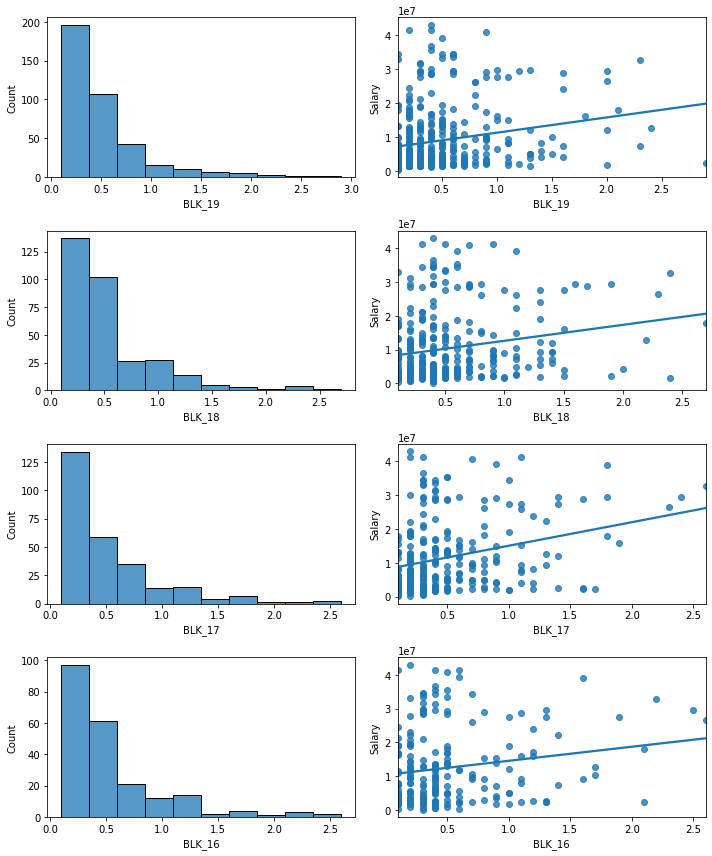

# *FGA*

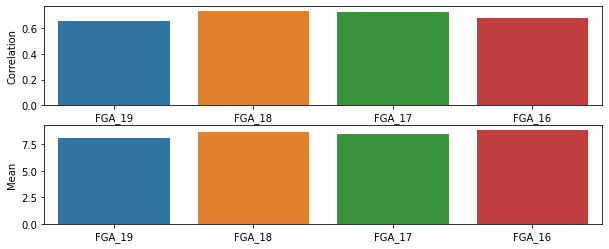

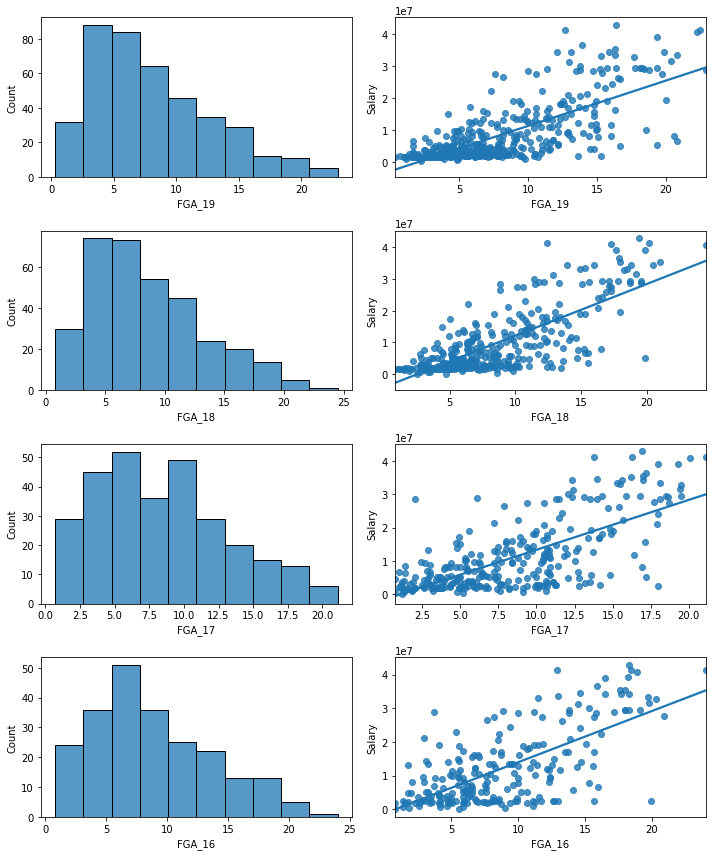

# *GS*

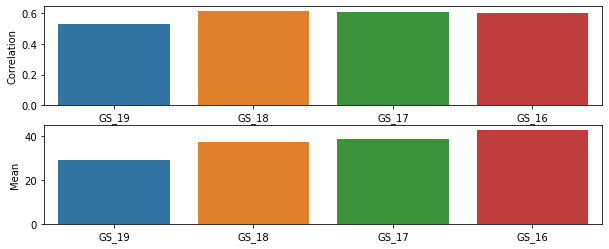

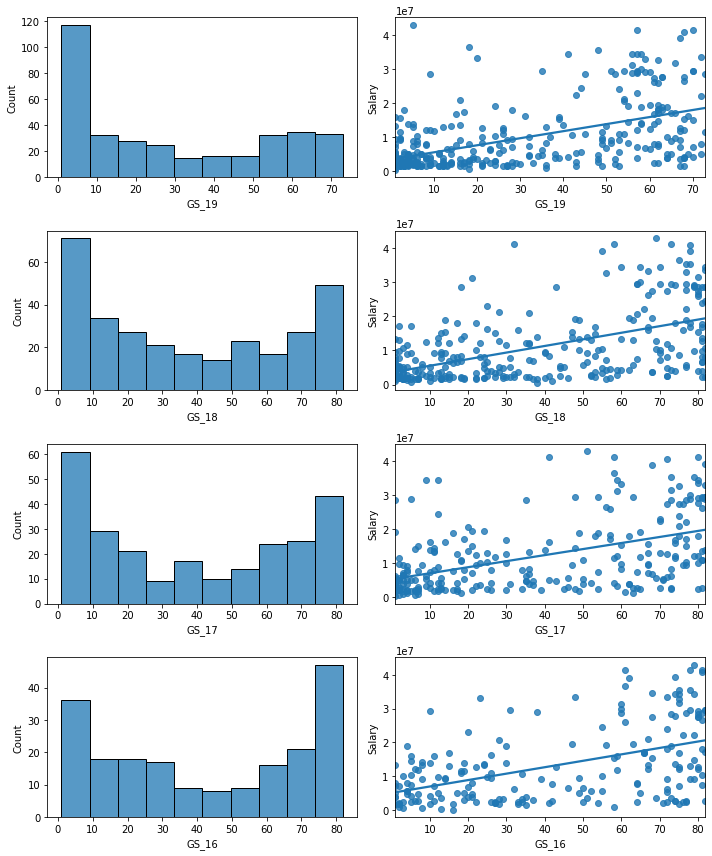

# *MP*

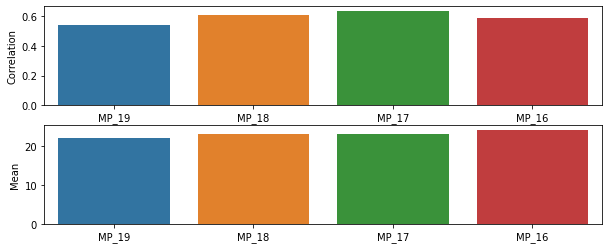

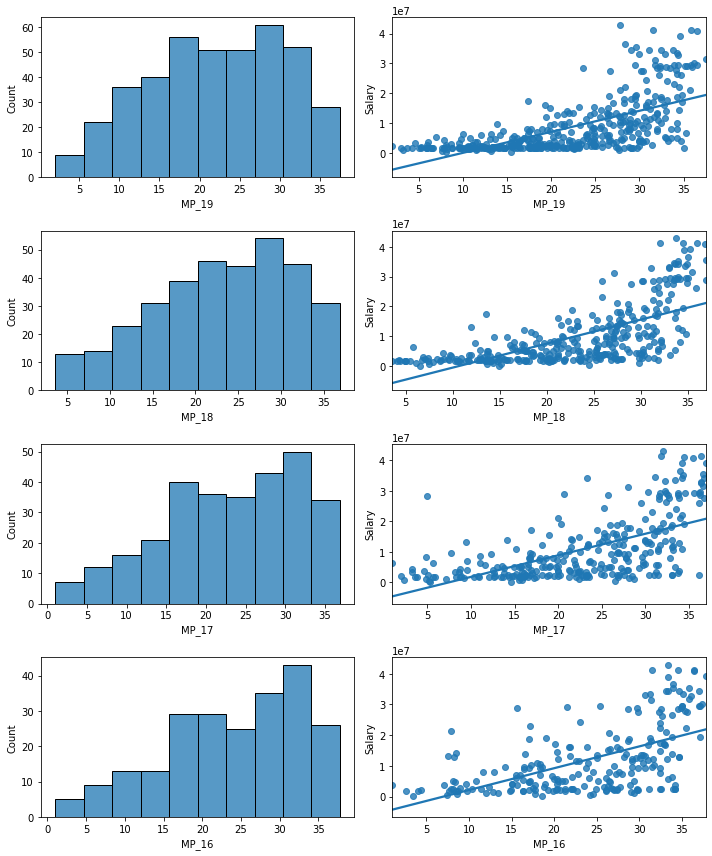

# *FT%*

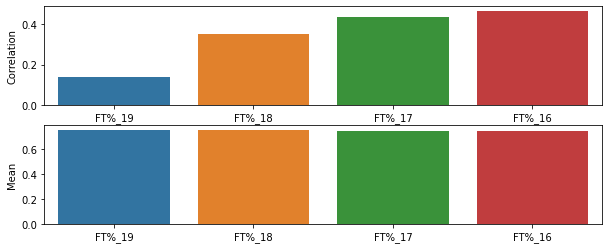

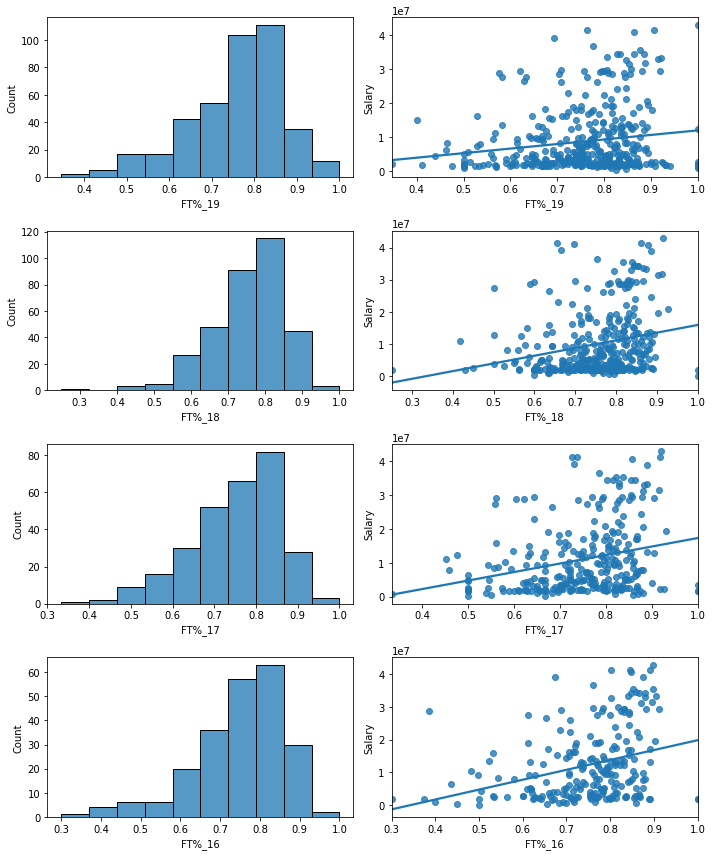

# *FG*

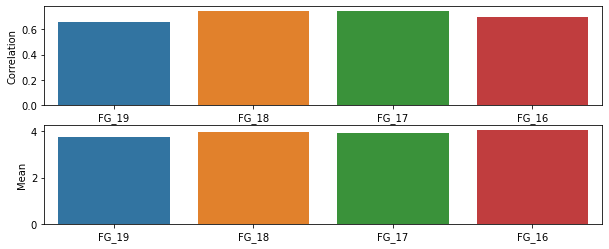

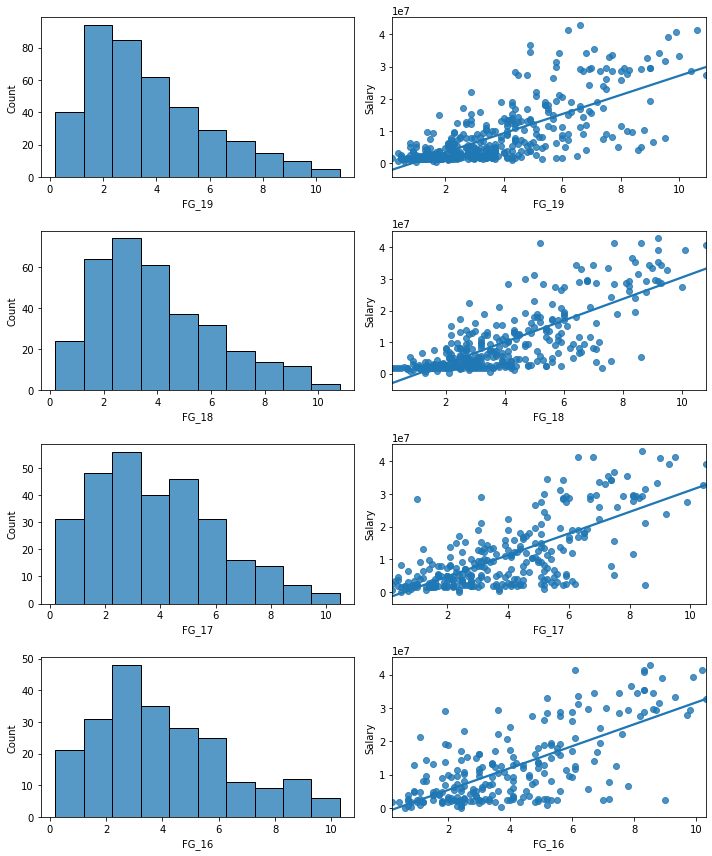

# *ORB*

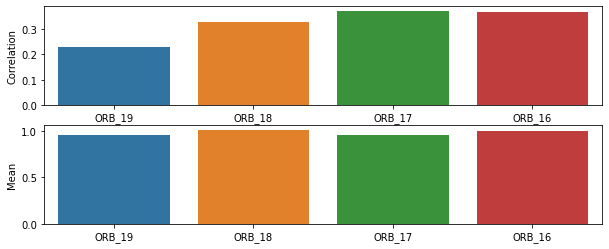

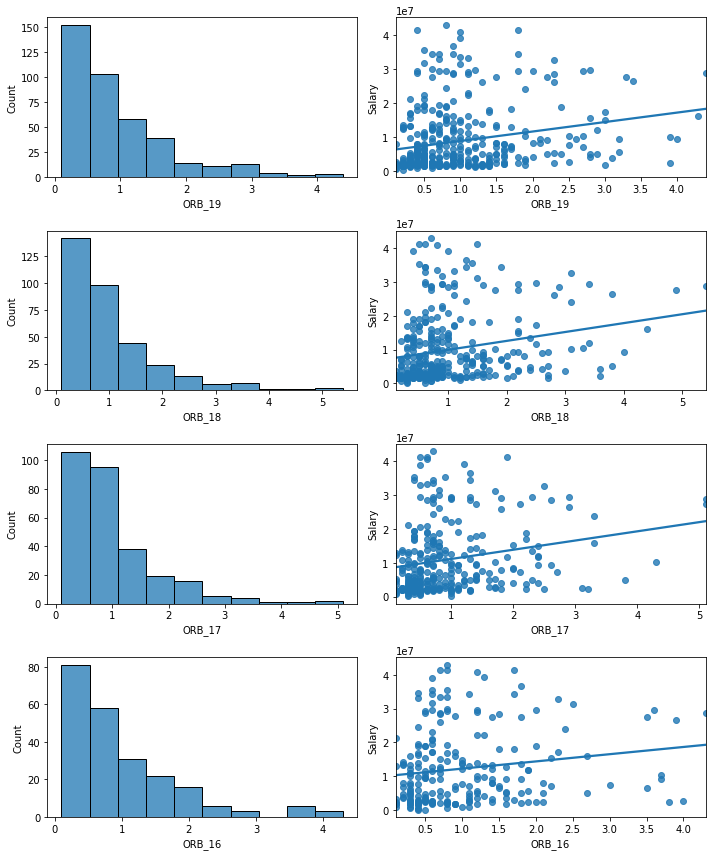

# *2P%*

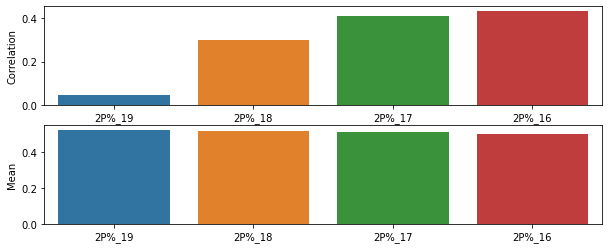

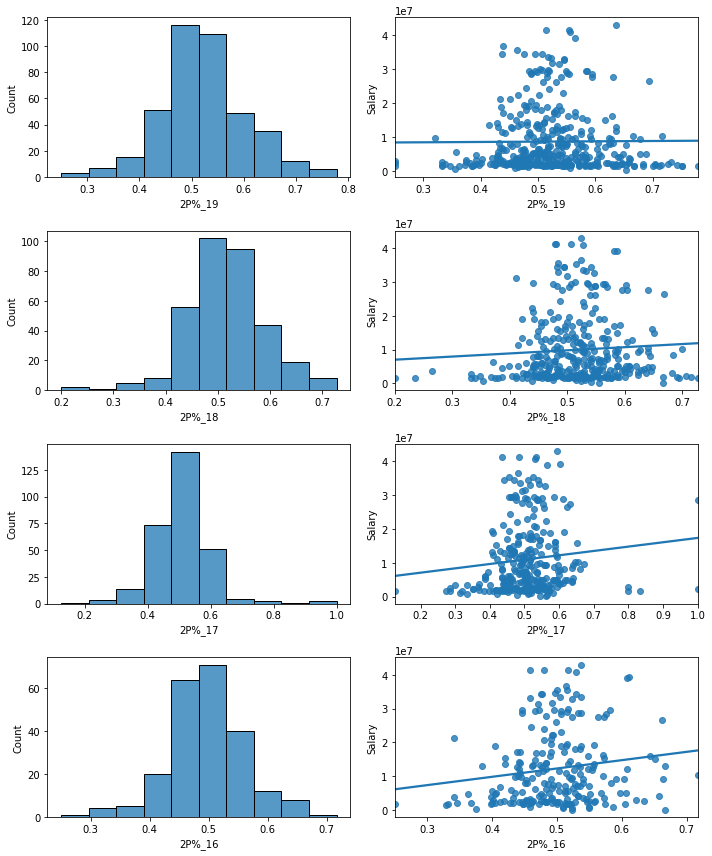

# *FG%*

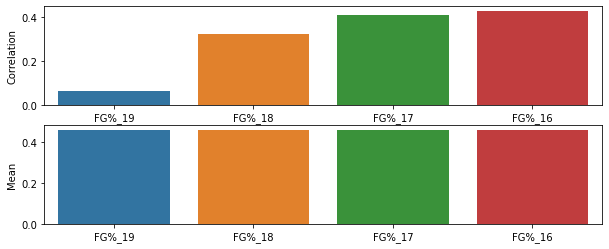

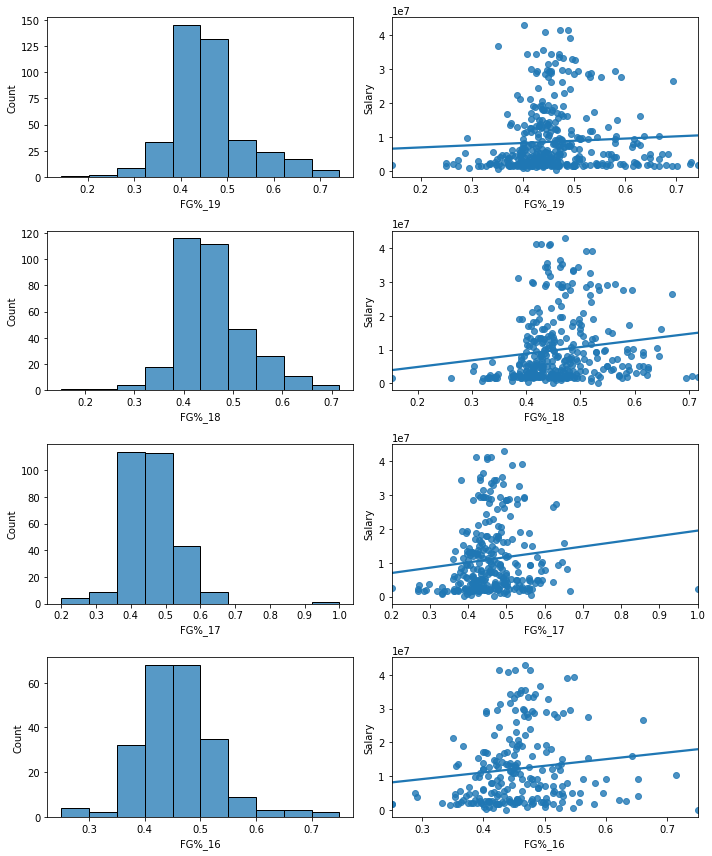

# *PF*

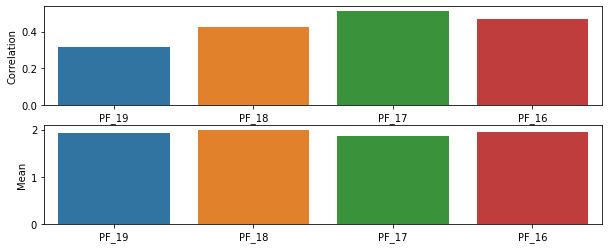

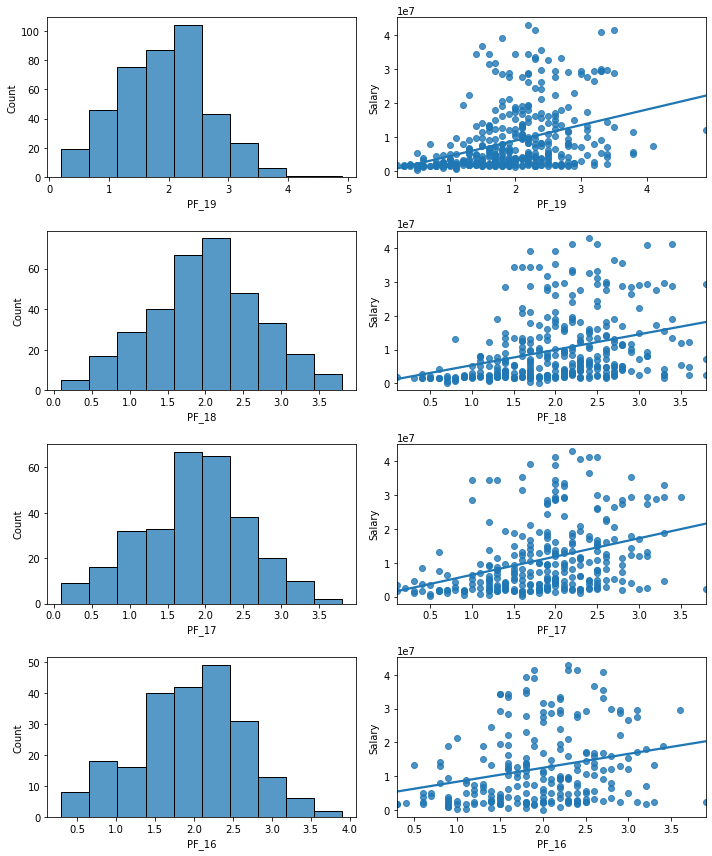

# *DRB*

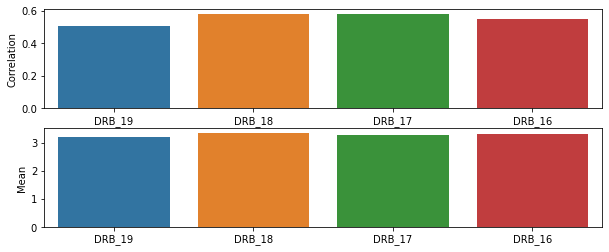

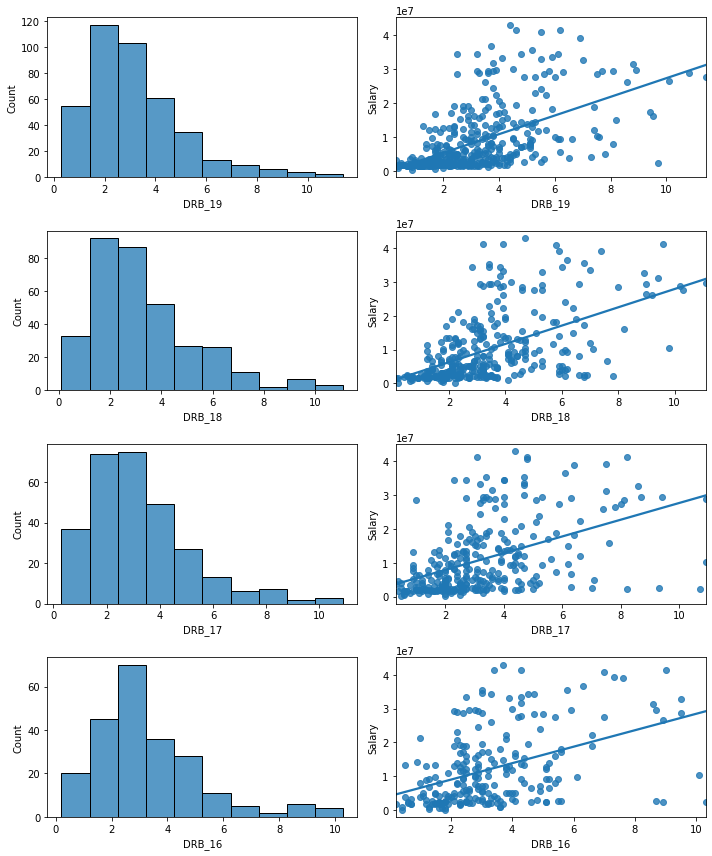

# *3PA*

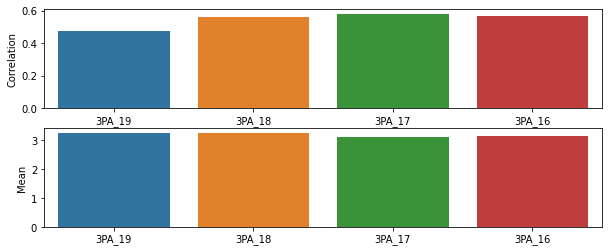

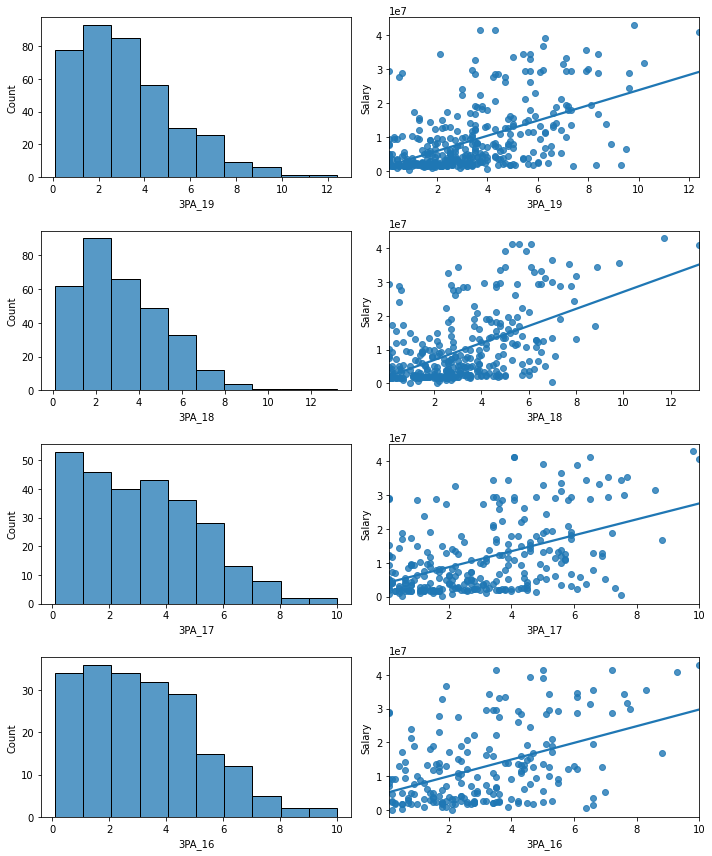

# *PTS*

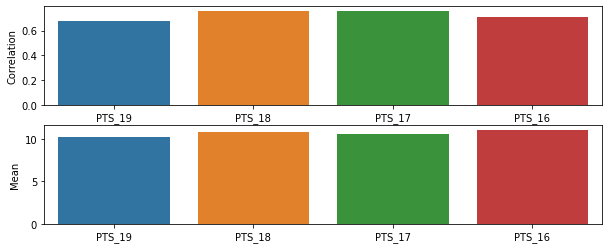

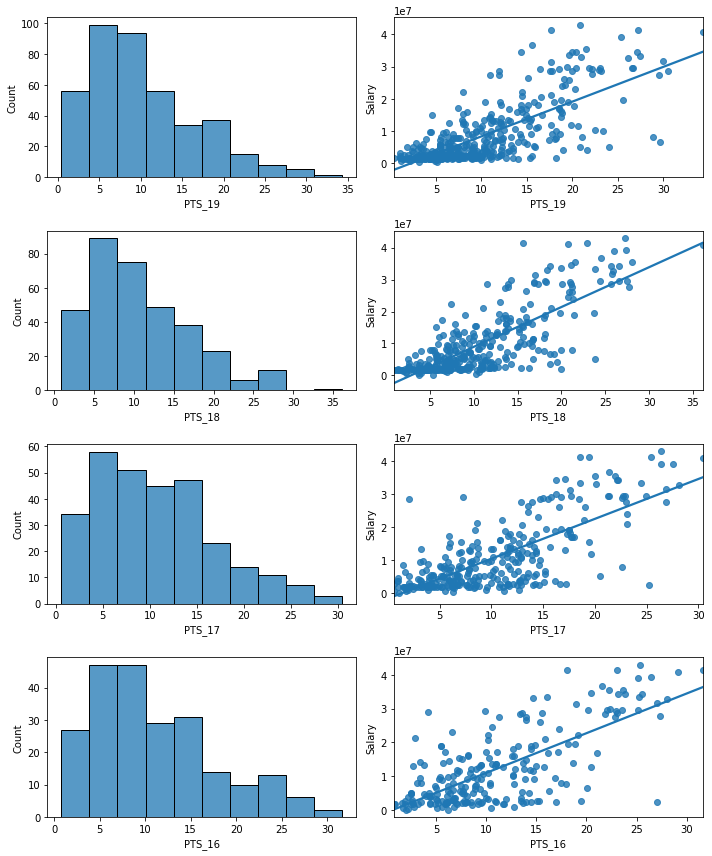

# *FT*

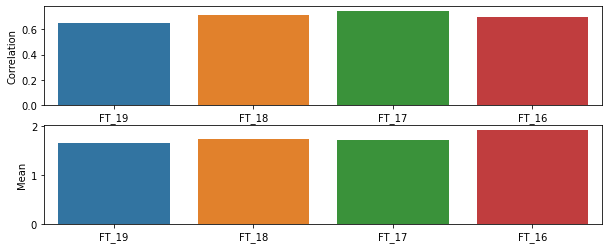

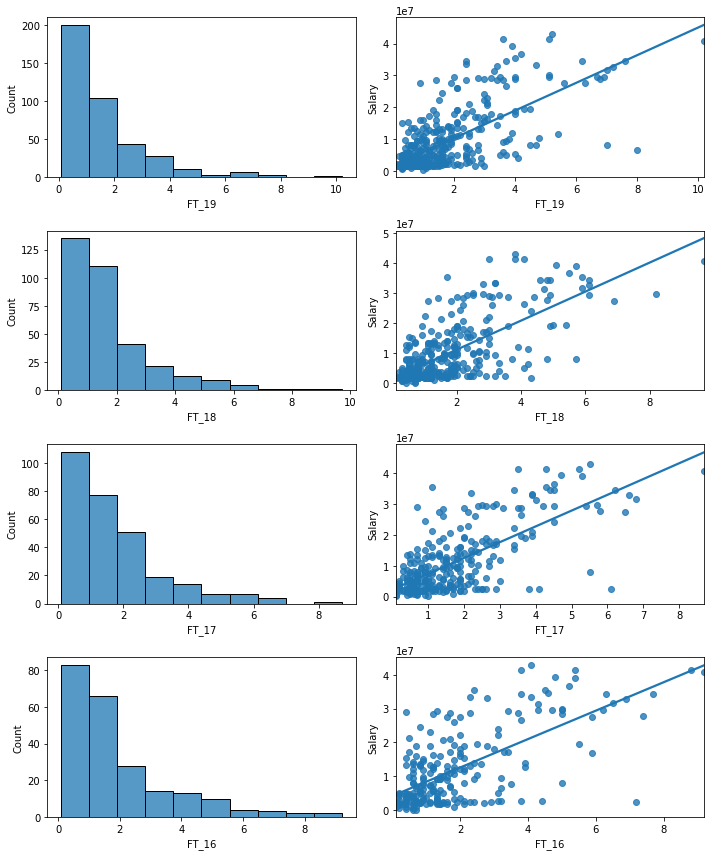

# *TRB*

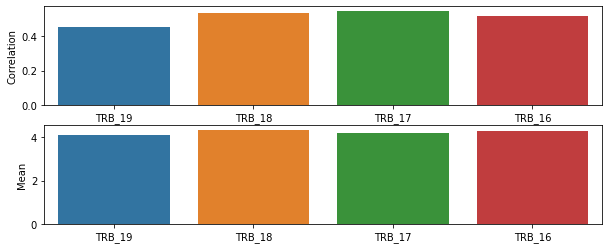

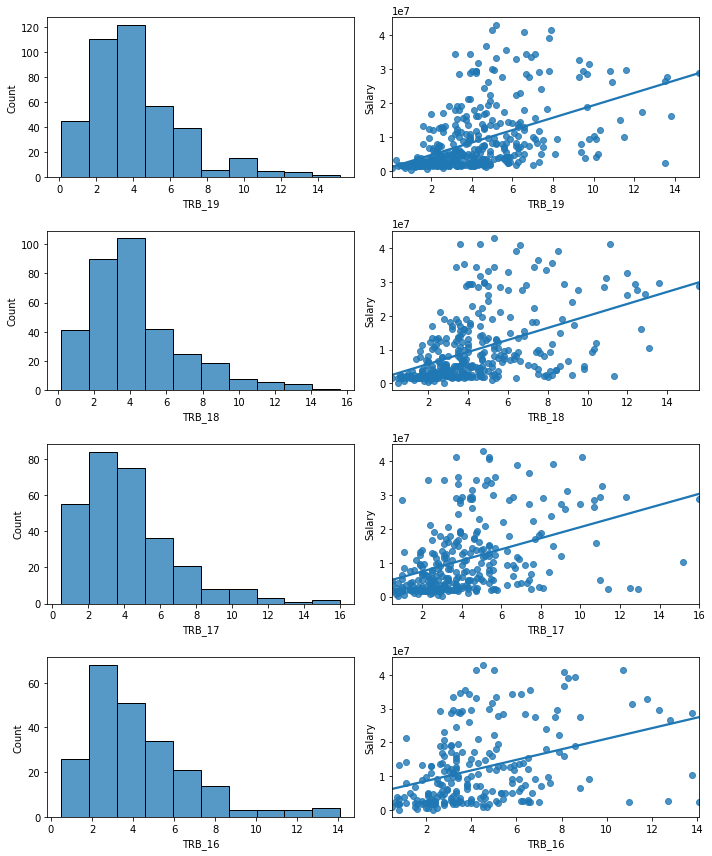

# *3P*

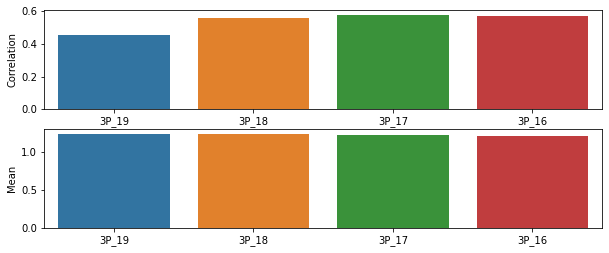

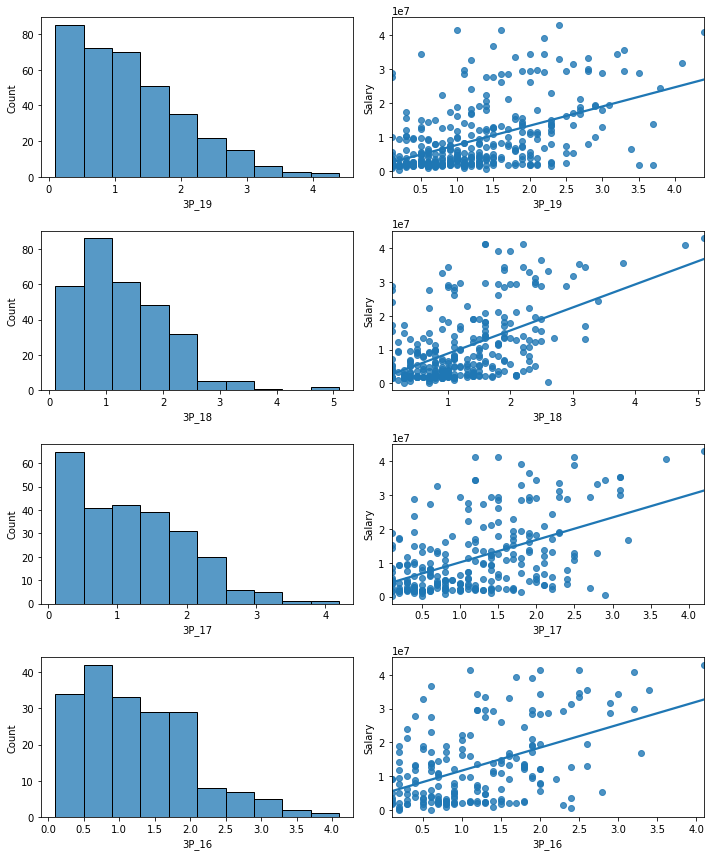

# *3P%*

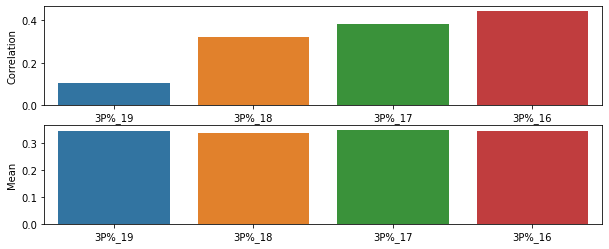

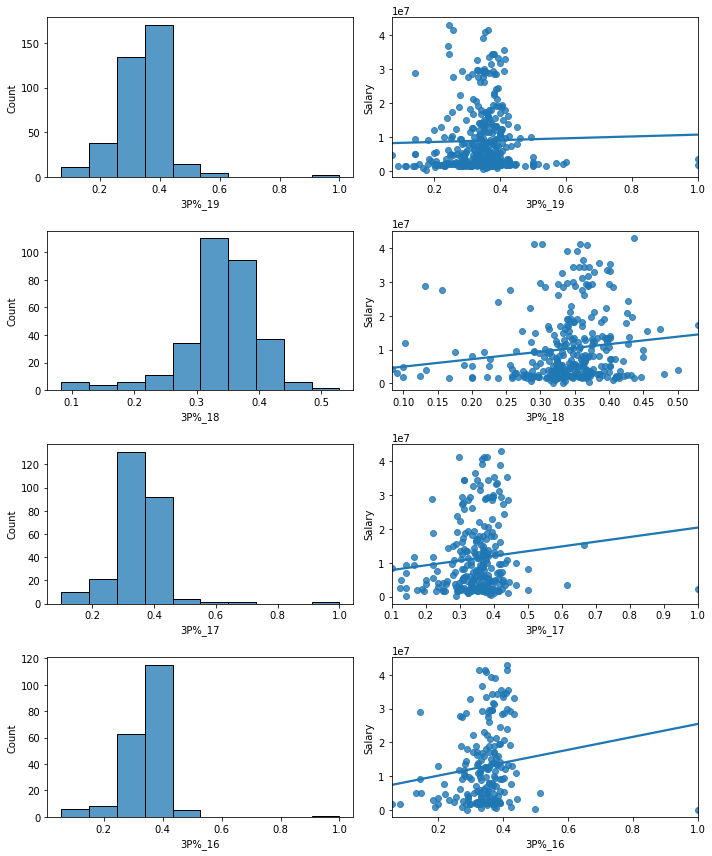

# *G*

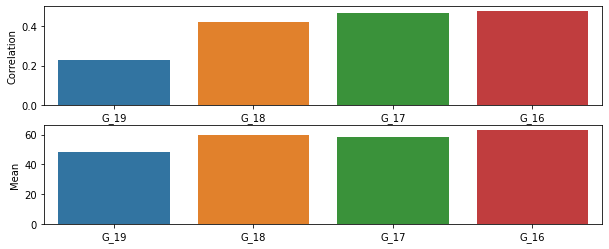

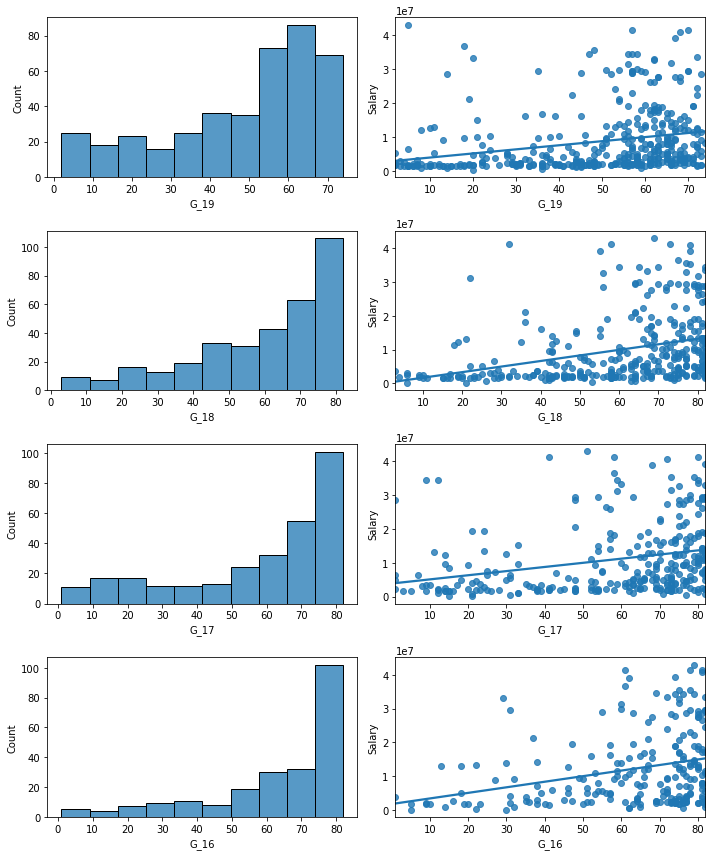

# *AST*

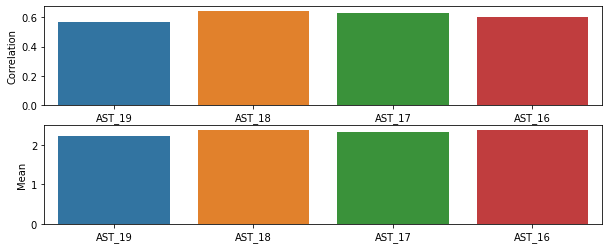

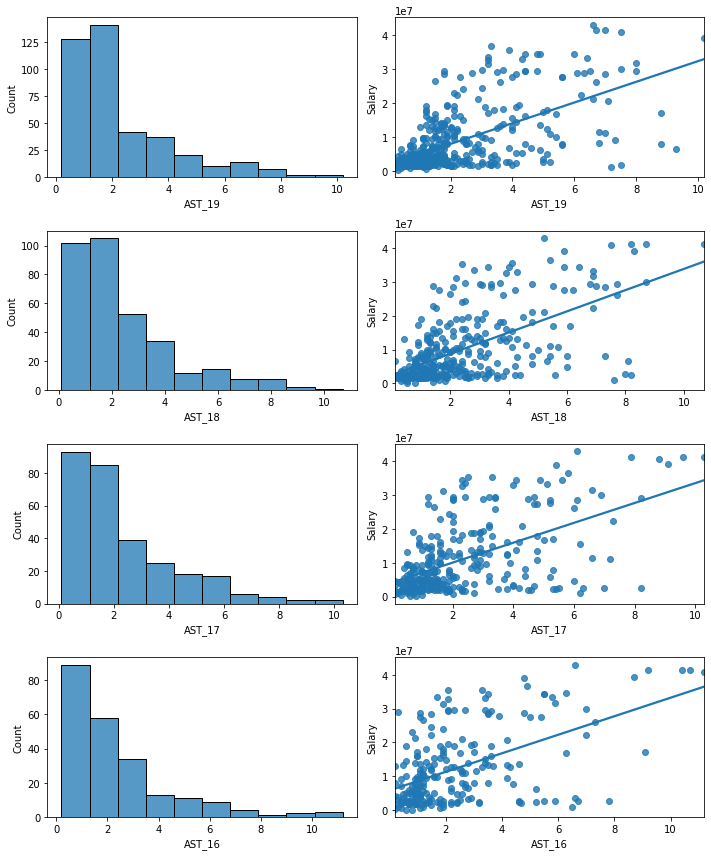

# *FTA*

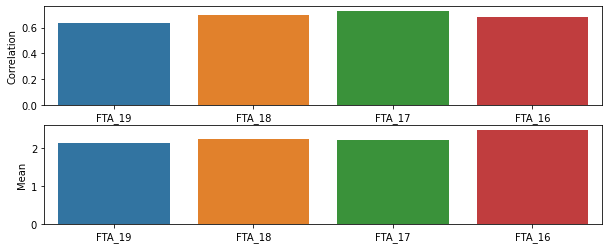

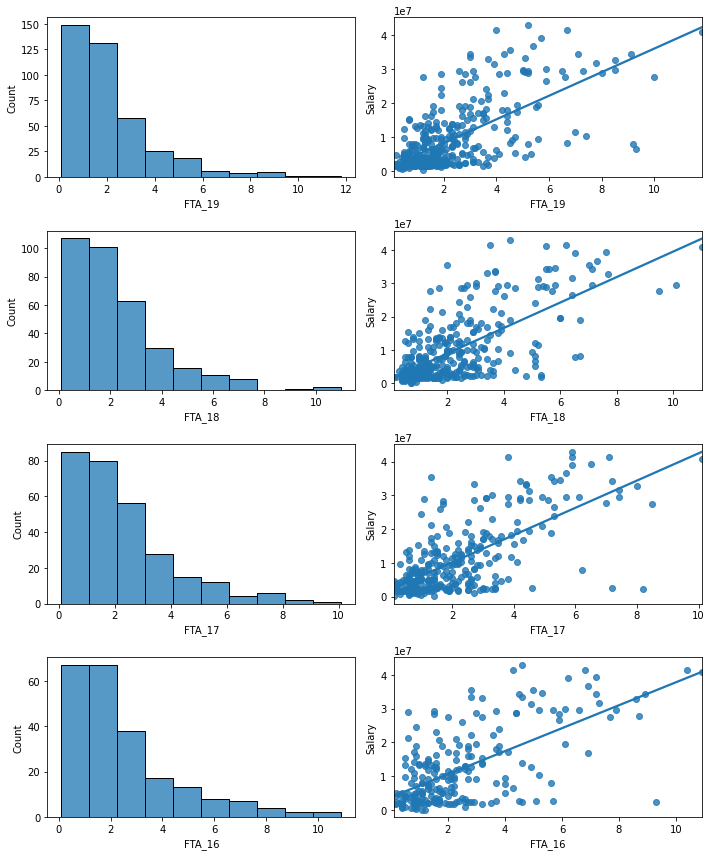

# *2P*

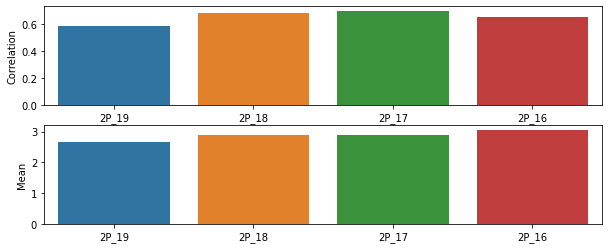

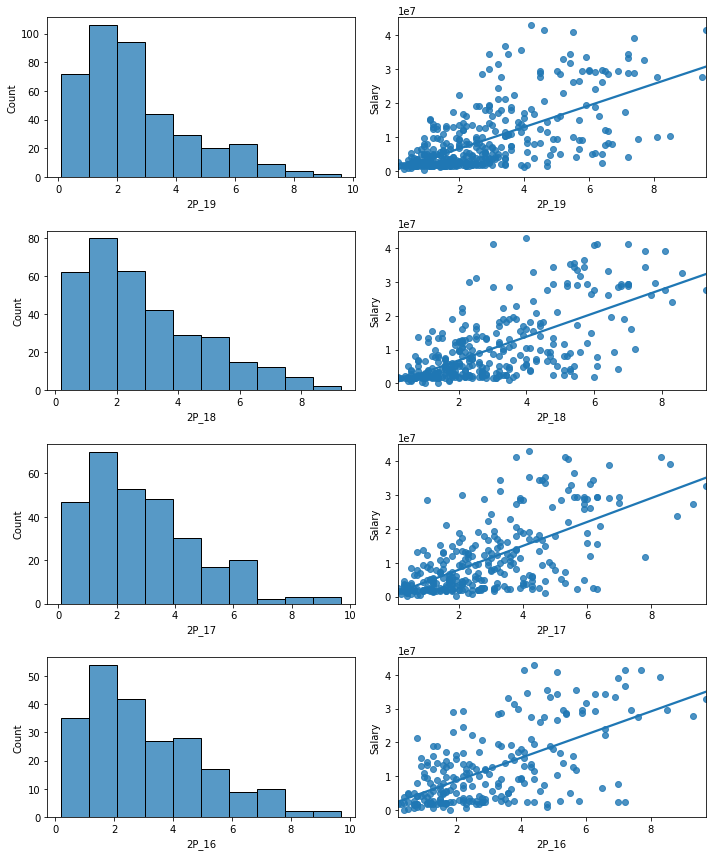

# *2PA*

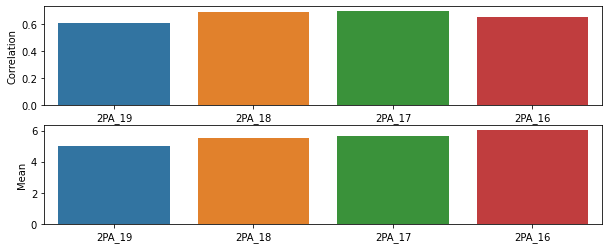

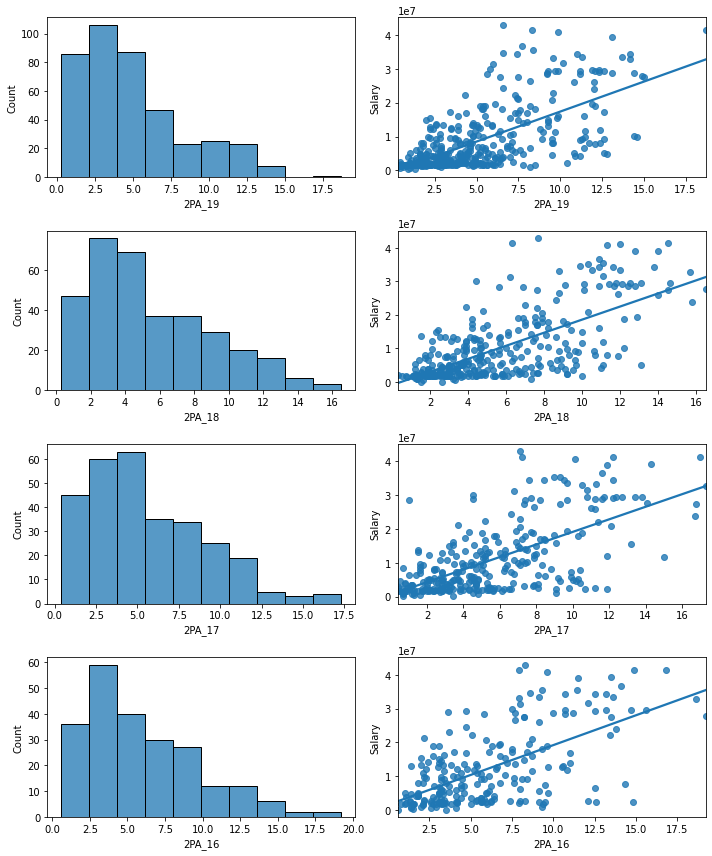

# *TOV*

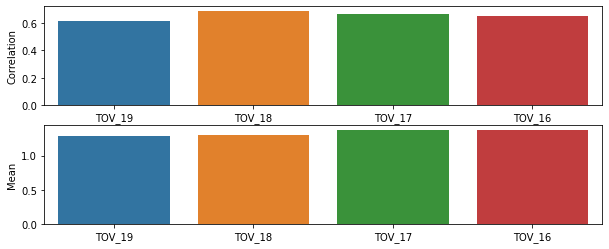

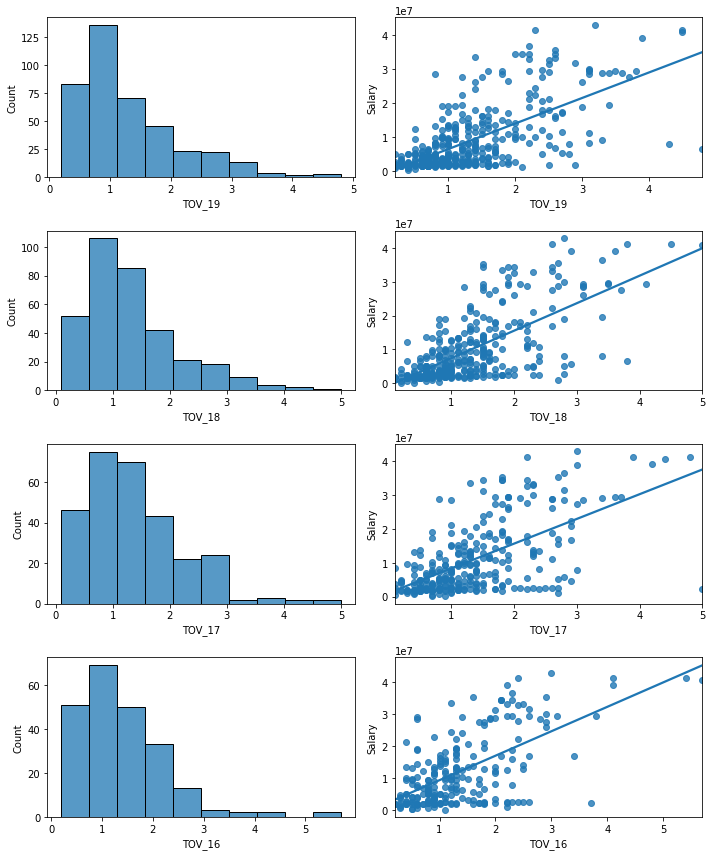

# *eFG%*

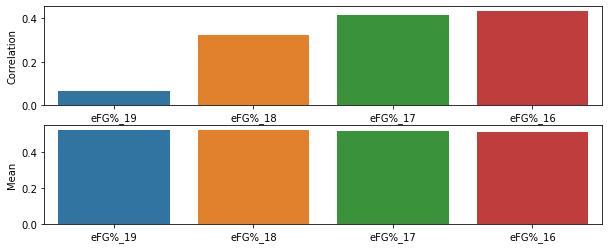

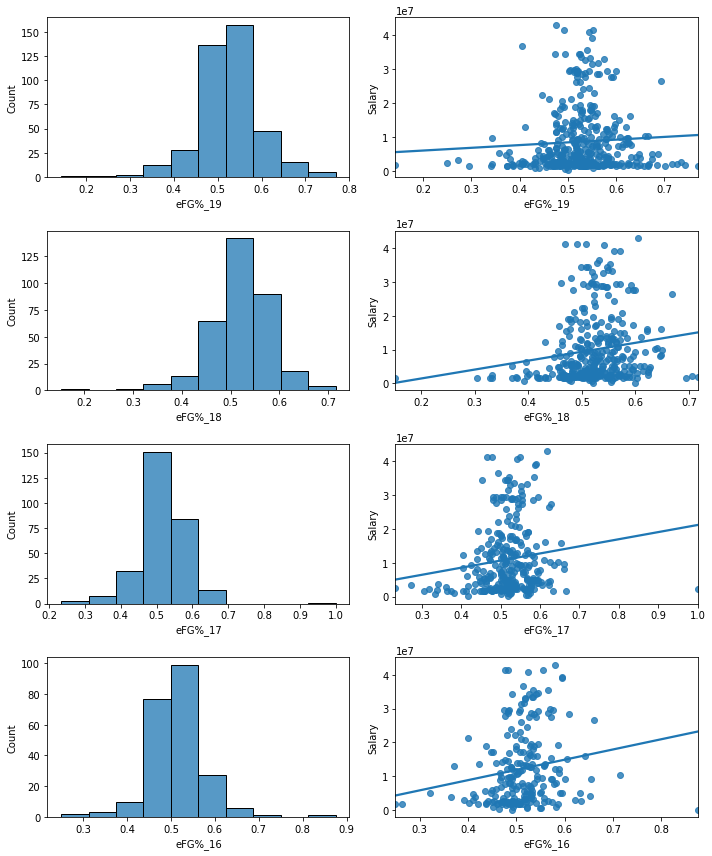

# *STL*

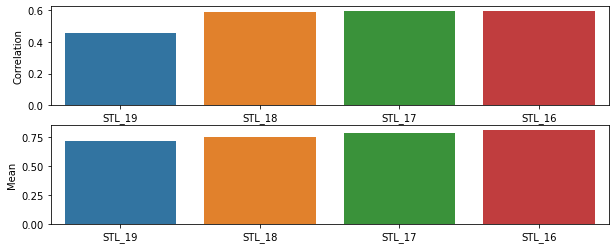

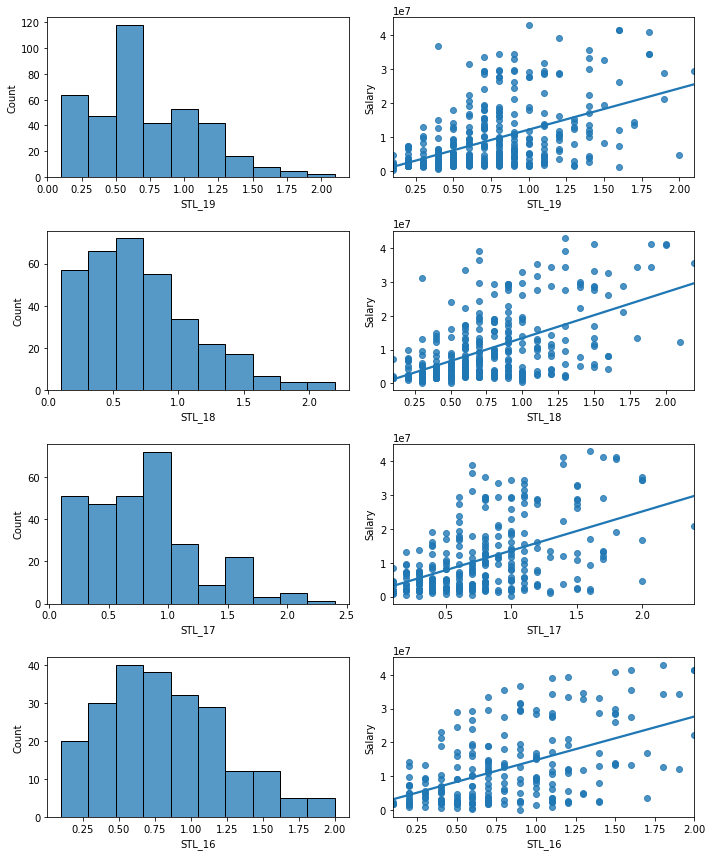

In [15]:
cols_postfixs = ['_19', '_18', '_17', '_16']
cols_prefixs = set([col.split('_')[0] for col in reduced_data.columns if len(col.split('_')) > 1])

for col_prefix in cols_prefixs:
    cols = [col_prefix + cols_postfix for cols_postfix in cols_postfixs]
    features = [data[col] for col in cols]

    default_analysis_for_numeric_feature(features, data['Salary'])

In [16]:
from sklearn.decomposition import FactorAnalysis

In [17]:
def pos_to_num(pos):
    pos_dict = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5,
                'PG-SG': 1.5, 'SG-SF': 2.5, 'SF-PF': 3.5, 'PF-C': 4.5,
                'SG-PG': 1.5, 'SF-SG': 2.5, 'PF-SF': 3.5, 'C-PF': 4.5,
                'SF-C': 4}
    return pos_dict[pos]

reduced_data['Pos'] = reduced_data['Pos'].apply(pos_to_num)

In [18]:
transformer = FactorAnalysis()
data_transformed = transformer.fit_transform(reduced_data[low_corr_cols])

data_transformed.shape

(428, 36)

In [19]:
fa_components = pd.DataFrame([[el for el in lst if el] for lst in transformer.components_],
                             columns=low_corr_cols)
fa_components.dropna(inplace=True)

fa_components

Pos       Age       G_19      GS_19     MP_19    3P%_19    FT%_19  \
0  -0.038461  2.308768  10.435927  16.178612  6.305157  0.024696  0.049447   
1   0.124101  1.173724 -14.006355 -12.098638 -4.477757 -0.041613 -0.085068   
2   0.043664  0.731586  -1.360113 -10.046778 -1.988455 -0.008481 -0.008803   
3  -0.046201 -0.145280   7.537685   5.934557  1.669616  0.025240  0.032717   
4  -0.025132  0.941380   7.835241  -1.799600  0.394189  0.017196  0.030669   
5  -0.107565  0.013232   7.171688  -8.172152 -0.158001  0.027636  0.050460   
6   0.039387  0.275993   2.776444  -2.491476 -0.649332  0.005275  0.004367   
7  -0.477594 -0.092626  -0.690132  -0.995436  4.618099  0.038505  0.080378   
8  -0.690511  2.507298   0.110737   0.268532 -0.903359  0.011396  0.004309   
9  -0.475312 -2.581667   0.148024   0.049950 -0.818138 -0.018000 -0.029955   
10  0.458941  0.187207   0.060891   0.002377 -0.334098 -0.038484 -0.037841   
11  0.035979  0.105529   0.003360  -0.004584 -0.069204 -0.012634 -0.000175   
12 -0.075829  0.015147  -0.000406  -0.001105 -0.023915  0.011601 -0.004312   
13 -0.205620  0.056508   0.001597  -0.001673 -0.046557 -0.020607 -0.025556   
14 -0.157445  0.000015   0.006311  -0.008714  0.051820 -0.003353 -0.022263   
15 -0.145966  0.014498  -0.005681   0.001083 -0.035924  0.010818  0.004929   
16  0.017539 -0.008344   0.001128  -0.001824  0.033266  0.003268 -0.001909   
17 -0.016162 -0.014635  -0.006741   0.007814 -0.075403  0.026748  0.041341   

      ORB_19    AST_19    STL_19  ...    AST_17    STL_17    BLK_17    TOV_17  \
0   0.268128  0.987794  0.210822  ...  1.248143  0.385681  0.246921  0.728734   
1  -0.142126 -0.405925 -0.131945  ...  0.454786  0.116885  0.080541  0.274314   
2  -0.068312 -0.385848 -0.078669  ...  0.003932  0.022073 -0.007764 -0.011308   
3   0.034402  0.170601  0.054667  ...  0.132651  0.051956  0.020717  0.068194   
4   0.013193 -0.055712 -0.007146  ... -0.103939 -0.013589 -0.012508 -0.050672   
5  -0.035912 -0.050554  0.020693  ...  0.049683 -0.006554 -0.026740  0.005785   
6  -0.027681 -0.085023 -0.014861  ... -0.038707 -0.003532  0.015080 -0.012275   
7   0.033739  0.900999  0.181173  ...  0.533498  0.090105 -0.040947  0.164176   
8  -0.369454  0.601012  0.013636  ...  0.882414  0.116401 -0.097810  0.234260   
9  -0.203804  0.537988  0.042015  ...  0.592914  0.080953 -0.062705  0.185126   
10  0.416528  0.148130  0.033391  ...  0.358241  0.053501  0.192303  0.261833   
11  0.094407  0.403071 -0.084025  ... -0.046855 -0.148397 -0.050798 -0.063302   
12 -0.051141 -0.062621 -0.009350  ... -0.095176  0.007390 -0.031420  0.056218   
13  0.040541  0.145914  0.100097  ... -0.138429  0.073654 -0.021881 -0.074346   
14 -0.033869  0.051266 -0.011021  ...  0.083744  0.035571  0.073030  0.100503   
15 -0.074034  0.097615  0.021917  ... -0.103279 -0.019205  0.052608 -0.048995   
16  0.025803  0.025561 -0.029527  ... -0.084055 -0.011576 -0.000638 -0.019005   
17  0.014491  0.055714  0.009880  ... -0.002019  0.013064 -0.001552  0.003227   

       PF_17      GS_16    3P%_16    AST_16    STL_16    BLK_16  
0   0.830796  19.914172  0.097441  1.058962  0.334612  0.211883  
1   0.235097  12.428139  0.053482  0.616828  0.180071  0.117564  
2   0.218745 -11.789200  0.008754 -0.331202 -0.075975 -0.058595  
3   0.145275  -4.182781 -0.012161 -0.195208 -0.048897 -0.028915  
4   0.021515  11.214157  0.038420  0.370355  0.131289  0.076764  
5  -0.114237  -1.577834 -0.024641 -0.091887 -0.031245 -0.025332  
6   0.017520   1.123968  0.014467  0.102384  0.039573  0.040374  
7   0.017707   0.006753  0.009682  0.421595  0.061159 -0.066520  
8   0.011017  -0.252877  0.041119  0.840963  0.110832 -0.088848  
9  -0.020649   0.074087  0.019125  0.471207  0.048098 -0.057261  
10  0.241544  -0.103824 -0.033249  0.192302  0.027281  0.151091  
11 -0.160059   0.043909 -0.047064 -0.107553 -0.134956 -0.032279  
12  0.129200   0.032929 -0.018032 -0.397882 -0.077445 -0.066246  
13 -0.022827   0.004686 -0.007025 -0.155778  0.042450 -0.02998

<ipython-input-20-3e07c96e14ee>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i // 3, i % 3].set_xticklabels(fa_components.columns, rotation='vertical')


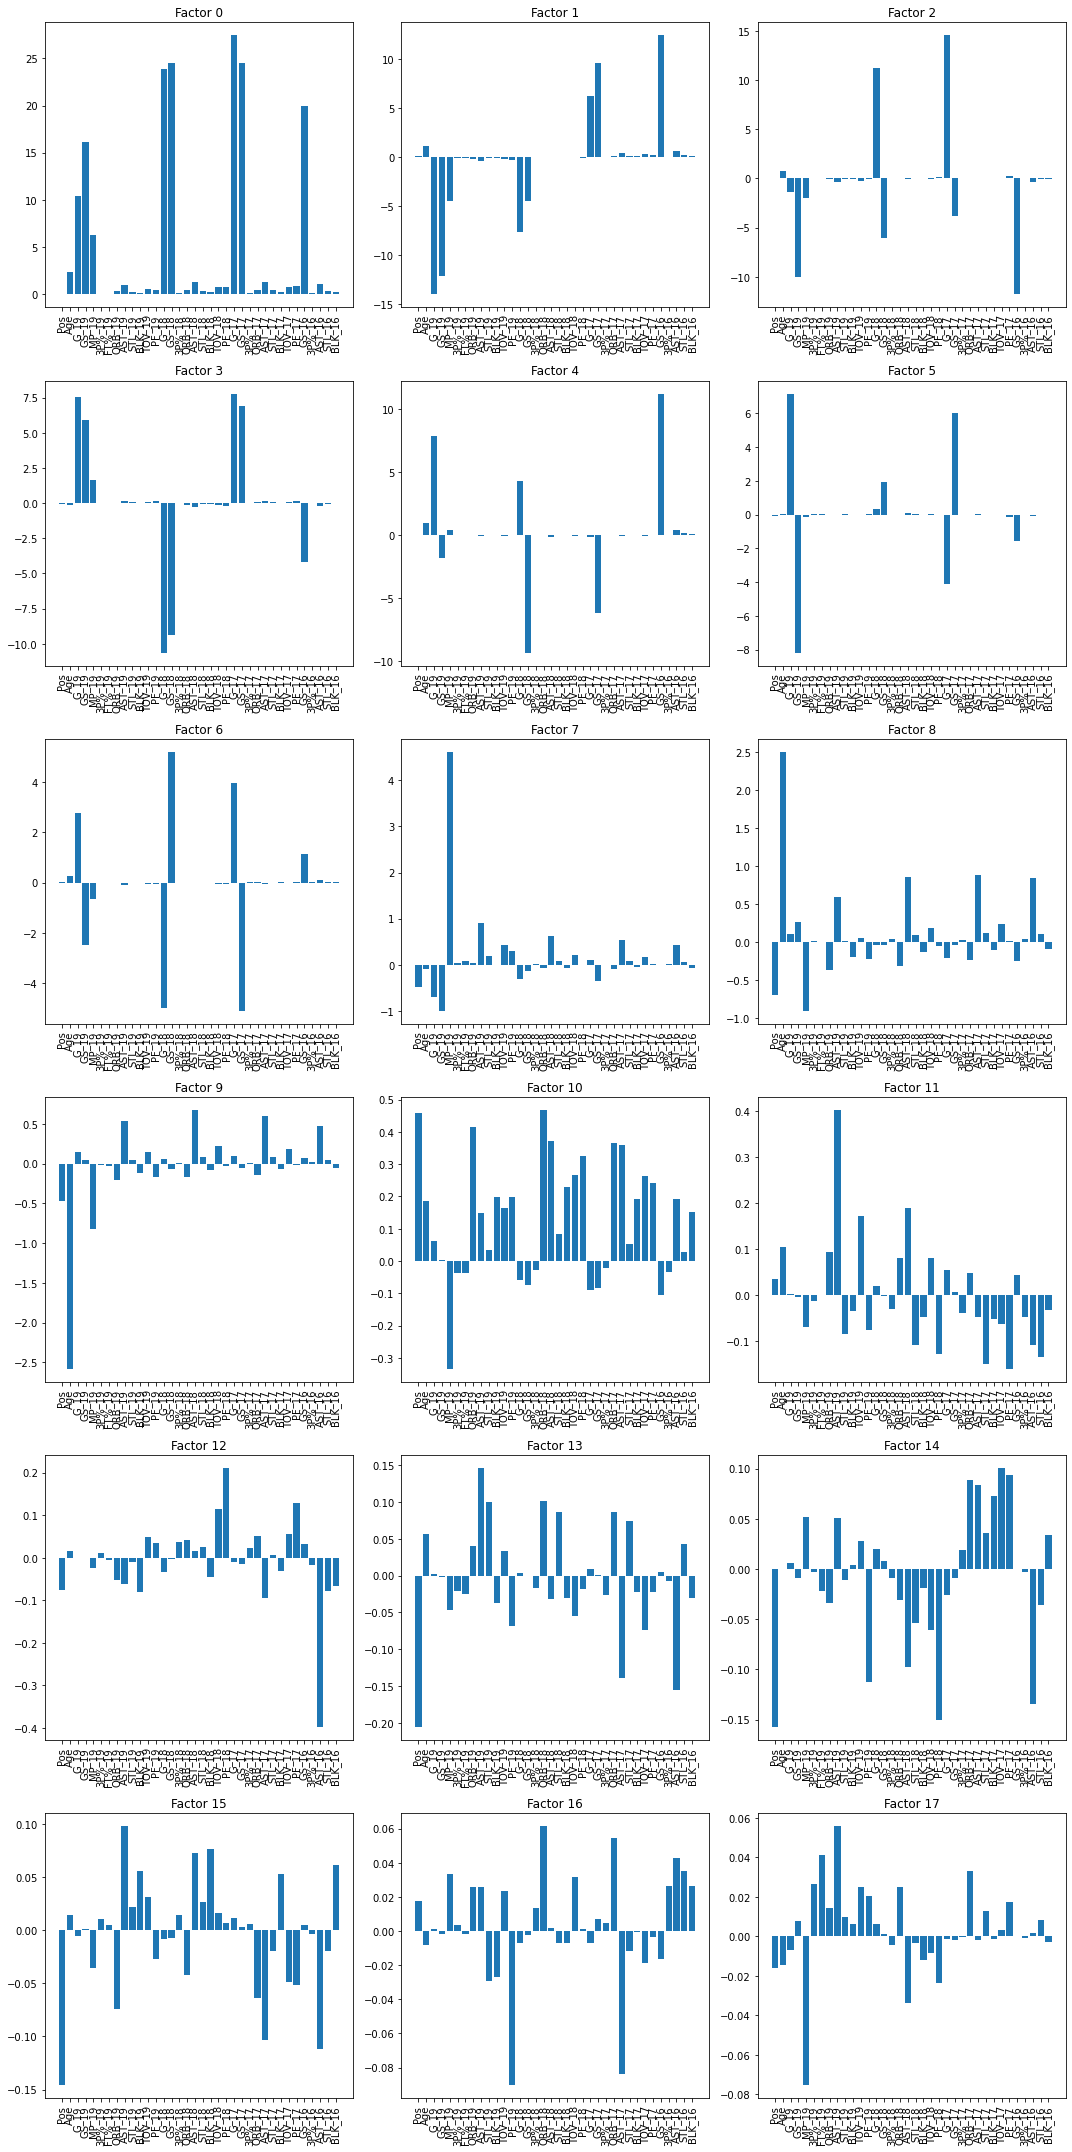

In [20]:
i = 0
fig, axs = plt.subplots(6, 3, figsize=(15, 30))
for i in range(len(fa_components)):
    axs[i // 3, i % 3].bar(fa_components.columns, fa_components.iloc[i])
    axs[i // 3, i % 3].set_title(f'Factor {i}')
    axs[i // 3, i % 3].set_xticklabels(fa_components.columns, rotation='vertical')
    i += 1

plt.tight_layout()
plt.show()


In [22]:
transformer = FactorAnalysis()
data_transformed = transformer.fit_transform(reduced_data.drop(['Salary'], axis=True))

In [23]:
fa_components = pd.DataFrame([[el for el in lst if el] for lst in transformer.components_],
                             columns=reduced_data.drop(['Salary'], axis=True).columns)
fa_components.dropna(inplace=True)

fa_components

Pos       Age       G_19      GS_19     MP_19     FG_19    FGA_19  \
0  -0.049938  2.544968   8.619961  14.290633  5.702205  1.401432  2.932233   
1  -0.103927 -1.087861  12.089976  13.569921  5.316031  1.105768  2.314092   
2  -0.071046 -0.837641   1.496836   9.708589  2.250195  0.744546  1.540503   
3   0.037640 -0.209394  -8.243624  -1.935713 -1.147633 -0.015821  0.001407   
4  -0.040896  0.086496  10.721671   6.753472  2.114044  0.276607  0.588825   
5   0.210465 -0.213245  -3.355189   5.788198 -1.175598 -0.655956 -1.345900   
6   0.131839  0.358853   6.550961  -4.718474 -1.164551 -0.749894 -1.607296   
7  -0.306048 -0.043479   4.311986  -5.023266  0.278119  0.178347  0.587337   
8  -0.362638 -0.013587  -1.958501   1.912420  0.503619  0.008095  0.300983   
9   0.643487 -0.715246  -0.707448  -0.507927  0.169972  0.287052 -0.017097   
10  0.172876  0.534628   1.388234   2.103253 -2.767167 -0.698546 -1.630505   
11 -0.132462 -0.010172  -0.003918   0.044741 -0.247856 -0.076864 -0.021933   
12  0.008620  0.294005  -0.141428  -0.459104  1.222067  0.053852  0.149310   
13  0.160843  1.269080  -0.265851  -0.179858  1.640422 -0.062247 -0.020342   
14  0.513513 -0.169226   0.098978  -0.007107 -0.874841  0.008020  0.048622   
15 -0.263586  0.526924   0.000223   0.030665 -0.287765 -0.118031 -0.170624   
16 -0.017326 -3.098489   0.048776  -0.065000  0.314018 -0.083522 -0.071888   
17  0.196638 -0.127099   0.144435  -0.019595 -0.677779  0.072706 -0.187948   
18 -0.110025 -0.199704   0.124223   0.009982 -1.067312  0.108971  0.306976   
19  0.086635 -0.171424  -0.067258  -0.051386  0.579334 -0.066719 -0.206227   
20  0.038395 -0.140673   0.024048  -0.034998 -0.470593  0.094755  0.101944   
21  0.119241 -0.234059  -0.038914   0.003997  0.010236  0.018557 -0.083628   
22  0.092100  0.212263   0.012573   0.024511 -0.296570  0.016148  0.017519   
23 -0.121417 -0.047133   0.017498  -0.025401  0.104523 -0.026232  0.060242   
24 -0.133843 -0.018454   0.003603  -0.030372  0.437651 -0.038947 -0.099492   
25 -0.112842 -0.120048  -0.025083   0.041220 -0.044758  0.003859 -0.110477   
26 -0.151865  0.060181   0.015242  -0.006954  0.116463  0.007993  0.029943   
27 -0.021919 -0.049351  -0.007178  -0.005255  0.164189  0.000754  0.053032   
28 -0.077863  0.037758  -0.019011   0.014705 -0.062089  0.025329  0.001650   
29 -0.077476 -0.053387  -0.017616   0.025182 -0.201915  0.018244 -0.053498   
30 -0.029836 -0.016160   0.006758  -0.002261  0.048899 -0.029762 -0.081596   
31 -0.090966  0.117422   0.004151  -0.003626  0.011601 -0.054050 -0.016974   
32  0.092327  0.024290  -0.001582   0.009141 -0.110276 -0.002854  0.002032   
33  0.017637 -0.041989   0.002431  -0.005537  0.043027 -0.037581 -0.000953   
34 -0.034331 -0.017688   0.001659   0.000835 -0.030402 -0.013959  0.024610   
35 -0.022636  0.001443   0.002692  -0.006308 -0.035808  0.034403 -0.052499   
36 -0.141382 -0.004612  -0.006399   0.002448 -0.056655  0.007863 -0.013665   
37 -0.129419 -0.003781  -0.001707   0.000111 -0.014463 -0.008458  0.024528   
38  0.000485  0.002263  -0.000234  -0.000564  0.010987 -0.001094  0.000087   
39  0.044739 -0.000955  -0.001830   0.000642  0.005300 -0.004565 -0.008006   

      FG%_19     3P_19    3PA_19  ...    FT%_16    ORB_16    DRB_16    TRB_16  \
0   0.016604  0.373558  1.005812  ...  0.283207  0.463248  1.653127  2.114893   
1   0.046174  0.308981  0.804030  ... -0.179251 -0.272468 -0.865060 -1.137335   
2   0.009503  0.142980  0.406571  ... -0.024617  0.095831  0.357255  0.453457   
3  -0.018414 -0.068494 -0.124248  ... -0.092929 -0.080701 -0.183655 -0.266046   
4   0.028035  0.121682  0.282437  ...  0.021883  0.018810 -0.001764  0.014132   
5  -0.023523 -0.132888 -0.378358  ...  0.039398  0.016805 -0.036155 -0.020402   
6   0.017883 -0.146805 -0.417702  ... -0.057429  0.057419 -0.025688  0.031867   
7   0.004075  0.166993  0.463879  ...  0.048653 -0.101107 -0.097844 -0.203209   
8  -0.023276  0.221067  0.569679  ...  0.028741 -0.211934 -0.350784 -0.558808   


In [24]:
fa_data = pd.DataFrame([[el for el in lst if el] for lst in data_transformed])
fa_data.set_index(data.index, inplace=True)

fa_data

0         1         2         3         4   \
Player                                                                          
Stephen Curry\curryst01      1.424734 -1.429183  0.905857  0.658824 -2.632717   
Russell Westbrook\westbru01  2.181154 -0.201760  1.589853  0.784204 -0.134283   
Chris Paul\paulch01          1.328372  0.274981  1.463545  0.078797  0.694355   
John Wall\walljo01           0.829355 -2.680366  0.904775  0.936070 -1.794977   
James Harden\hardeja01       2.210340  0.289709  1.855341  0.216841 -0.241374   
...                               ...       ...       ...       ...       ...   
Wayne Ellington\ellinwa01    0.309443 -0.826136 -1.479918 -0.423254 -0.435575   
A.J. Hammons\hammoaj01      -1.247825 -1.313975  0.440964  0.577497 -0.618286   
Rayjon Tucker\tuckera01     -1.344352 -0.587531  0.514036  0.700581 -0.209568   
Troy Williams\willitr02     -0.674908 -1.511223 -0.145377  0.427945 -0.907649   
Demetrius Jackson\jacksde01 -1.152706 -0.972487 -0.094172  0.977082 -0.756310   

                                   5         6         7         8         9   \
Player                                                                          
Stephen Curry\curryst01     -1.586751 -1.404754  0.762371  0.682127 -1.975350   
Russell Westbrook\westbru01 -2.010697 -1.460687  0.389874 -0.733699  0.599244   
Chris Paul\paulch01         -0.038716 -0.178033 -0.106860  0.402658 -1.616317   
John Wall\walljo01          -1.140036 -0.859923 -0.002094 -0.386575 -1.262328   
James Harden\hardeja01      -2.157179 -1.750831  0.996981  0.432006 -1.942568   
...                               ...       ...       ...       ...       ...   
Wayne Ellington\ellinwa01    0.911105 -0.989990  1.399736 -1.401099 -2.588874   
A.J. Hammons\hammoaj01       1.421003 -0.738795  0.121260  0.582784  0.477805   
Rayjon Tucker\tuckera01      0.415053  0.046173  0.128805 -0.188673 -0.124208   
Troy Williams\willitr02      0.268846 -1.135511 -0.733558  0.119562 -0.401995   
Demetrius Jackson\jacksde01  0.721053 -0.881359 -0.585067 -0.114632 -0.382329   

                             ...        30        31        32        33  \
Player                       ...                                           
Stephen Curry\curryst01      ... -0.178837  0.616449 -1.347065  1.151187   
Russell Westbrook\westbru01  ... -2.314439 -1.320155  1.116331 -1.311085   
Chris Paul\paulch01          ... -0.886920 -0.397682  0.327609  0.534637   
John Wall\walljo01           ... -1.831602 -0.011724 -1.252311 -1.169905   
James Harden\hardeja01       ... -2.136664 -0.863149 -1.198108  0.789383   
...                          ...       ...       ...       ...       ...   
Wayne Ellington\ellinwa01    ...  0.422764  0.831273 -0.732797  0.220244   
A.J. Hammons\hammoaj01       ... -0.088338 -0.867839  0.198231 -0.682405   
Rayjon Tucker\tuckera01      ...  0.291035 -0.177929  0.418137 -0.381877   
Troy Williams\willitr02      ... -0.308635  0.417269 -0.164552  0.597338   
Demetrius Jackson\jacksde01  ... -1.435604  2.612886 -0.923058 -1.346168   

                                   34        35        36        37        38  \
Player                                                                          
Stephen Curry\curryst01     -1.440616 -0.233741  0.142522  0.505867  0.549769   
Russell Westbrook\westbru01  2.786679 -0.549637 -0.718998 -0.404932 -0.367801   
Chris Paul\paulch01         -2.049247  0.352970 -0.299245 -0.360709 -0.766151   
John Wall\walljo01           0.039692  0.337244  0.678548 -0.999267 -0.106270   
James Harden\hardeja01       1.404424 -0.336245 -0.381697 -0.161354 -0.369612   
...                               ...       ...       ...       ...       ...   
Wayne Ellington\ellinwa01   -0.283089  0.273889  0.239655  0.131718  0.174598   
A.J. Hammons\hammoaj01       0.381397  0.024590  0.121863 -0.304484 -0.264608   
Rayjon Tucker\tuckera01     -0.135478 -0.259691 -0.024392  0.305919  0.047742   
Troy Williams\willitr02     -0.715080 -0.126915

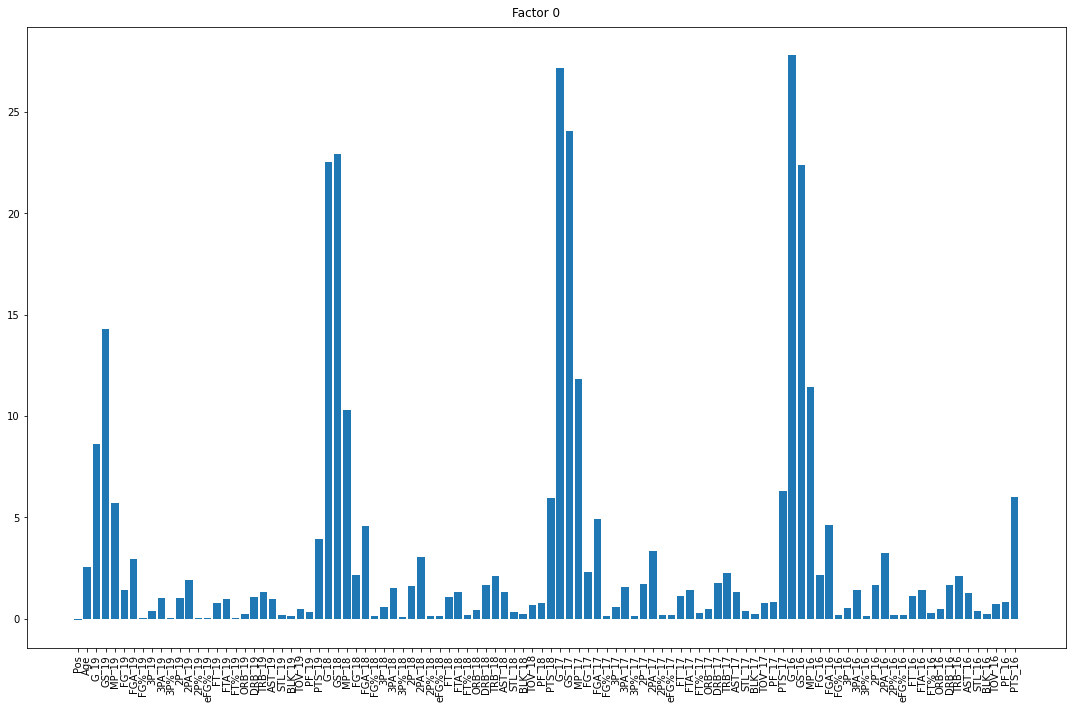

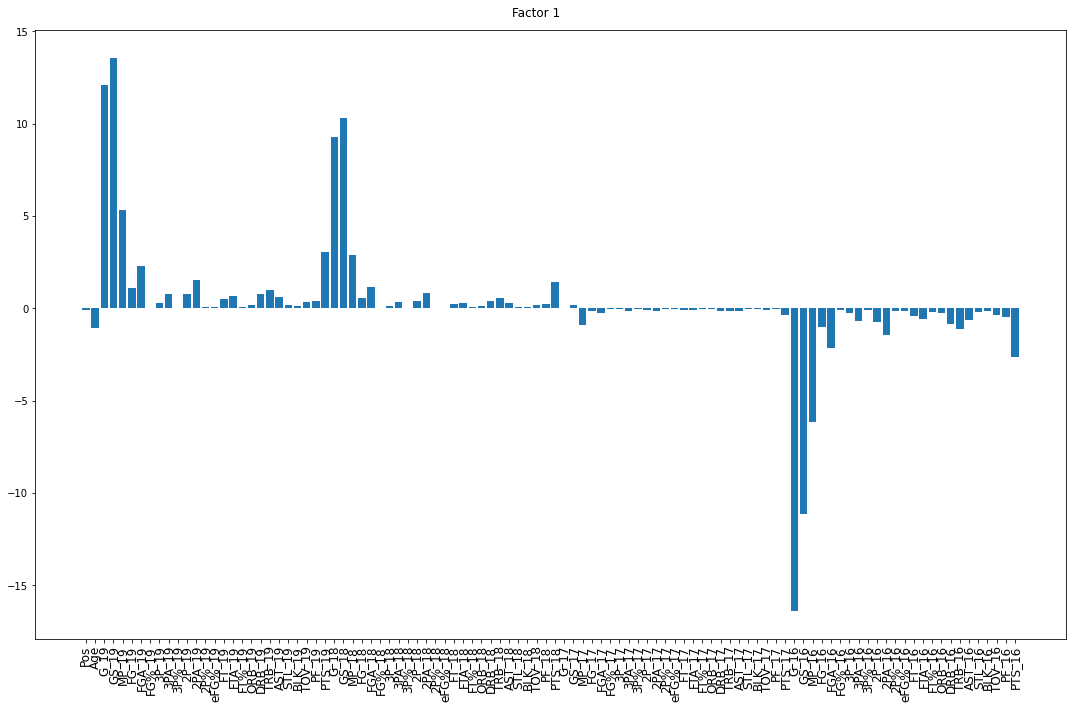

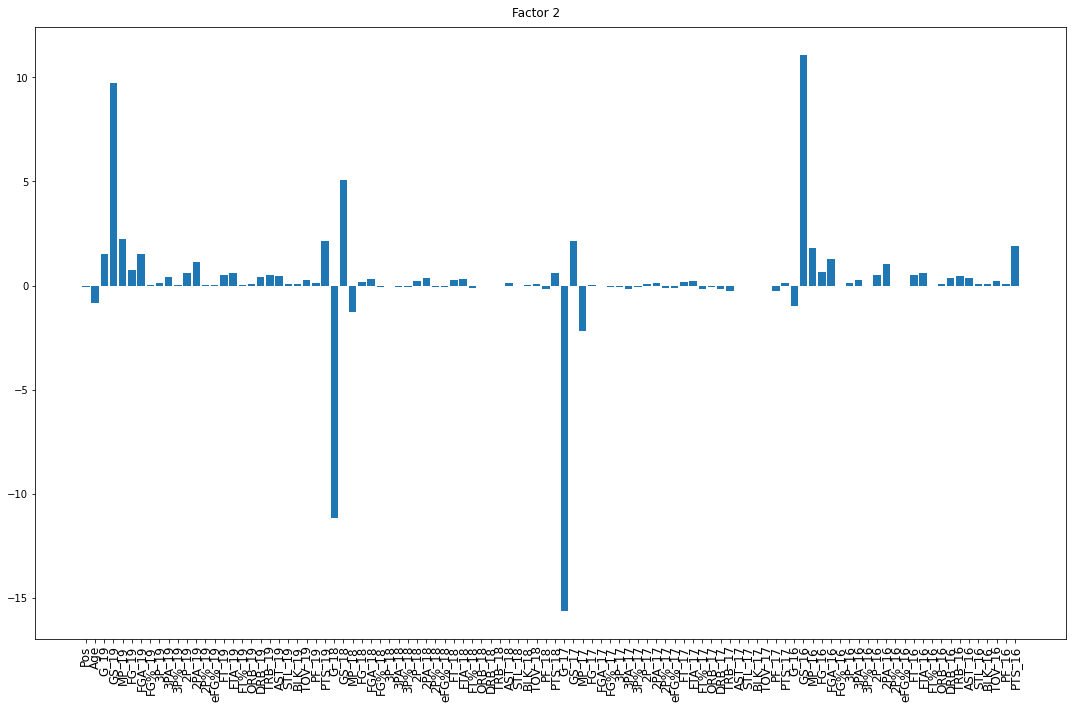

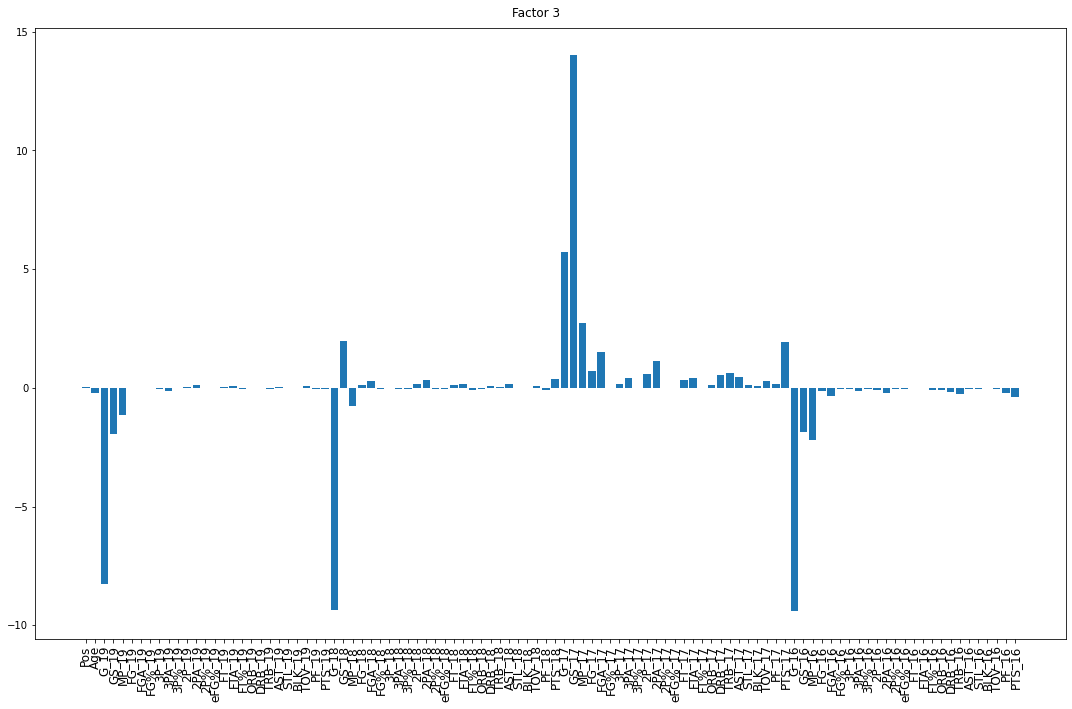

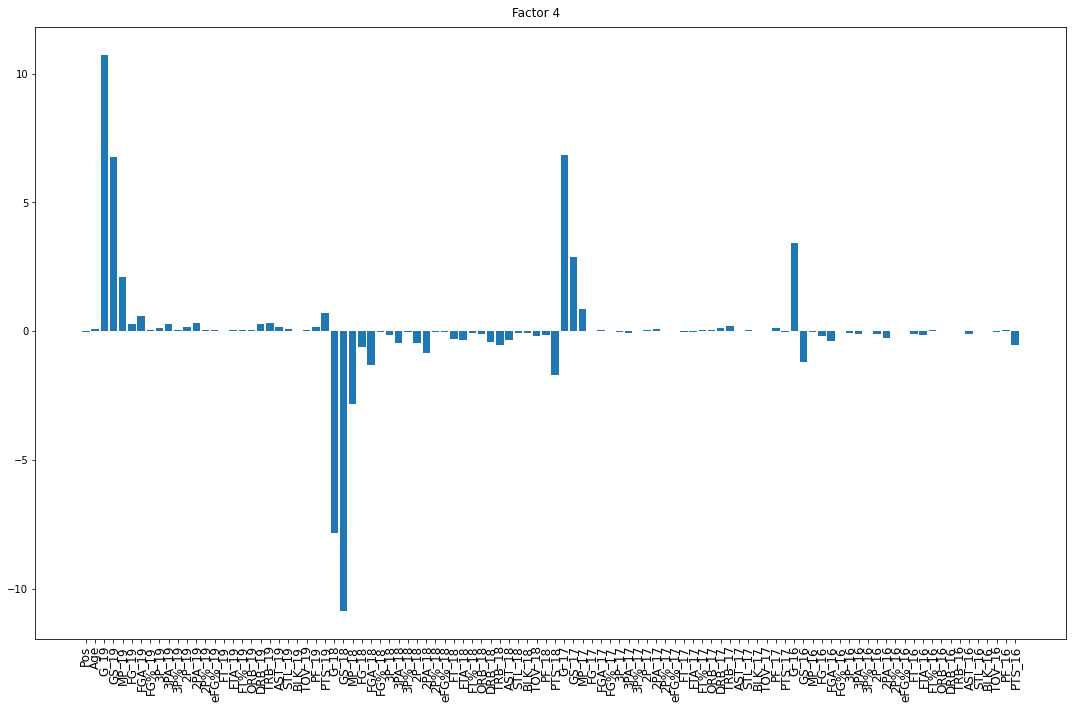

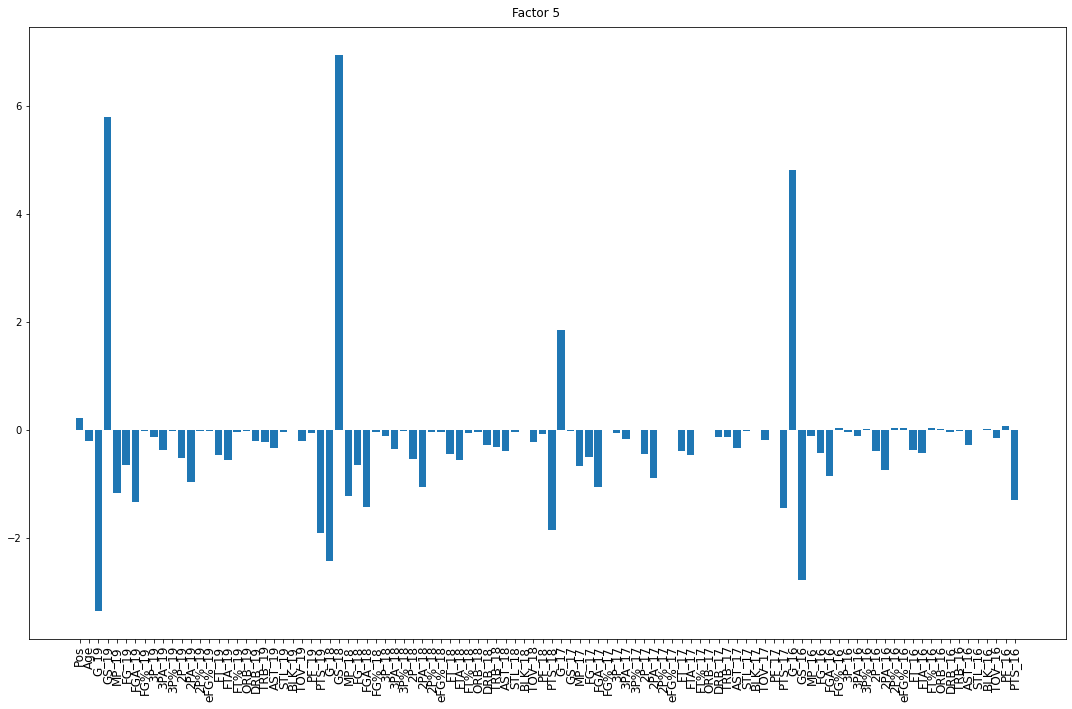

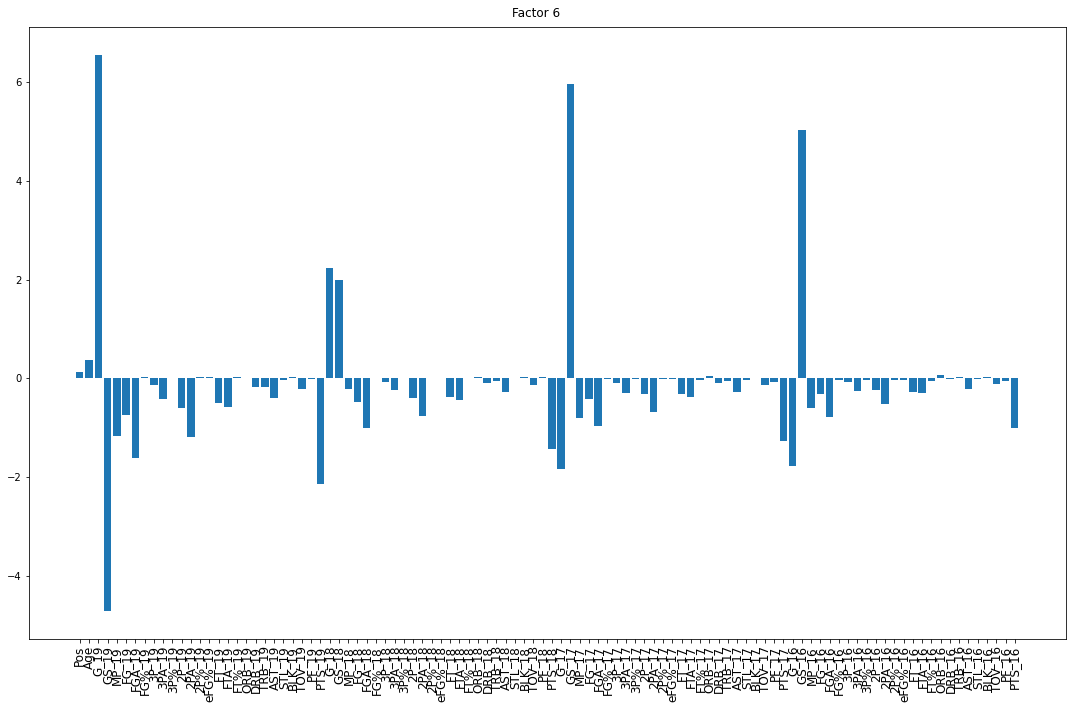

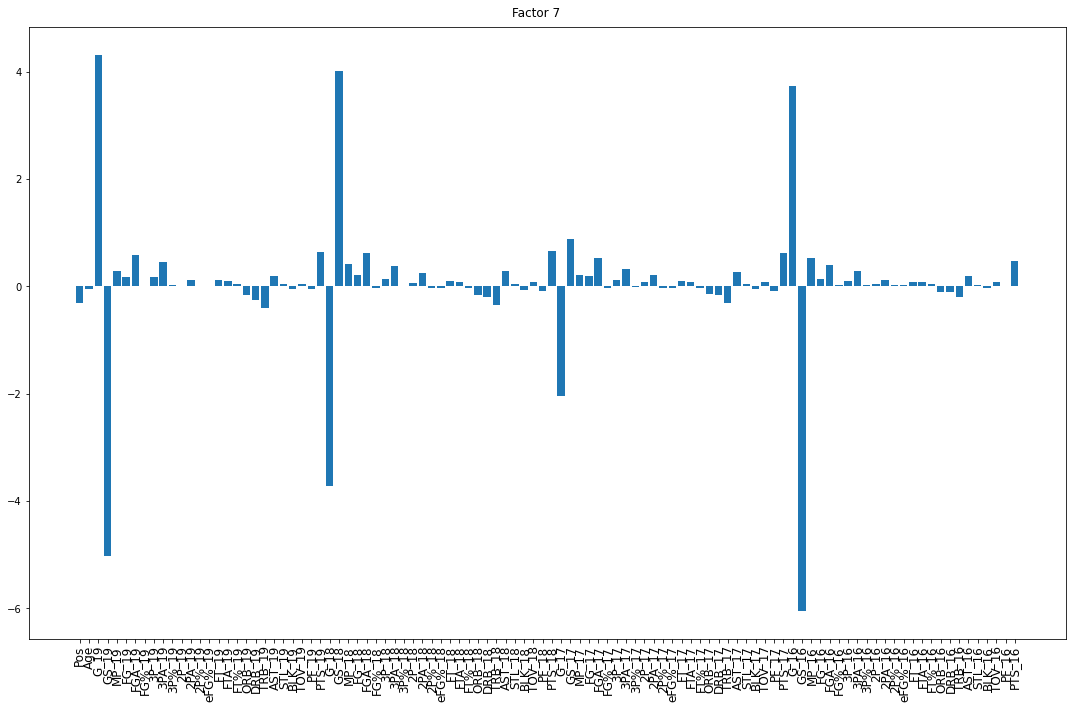

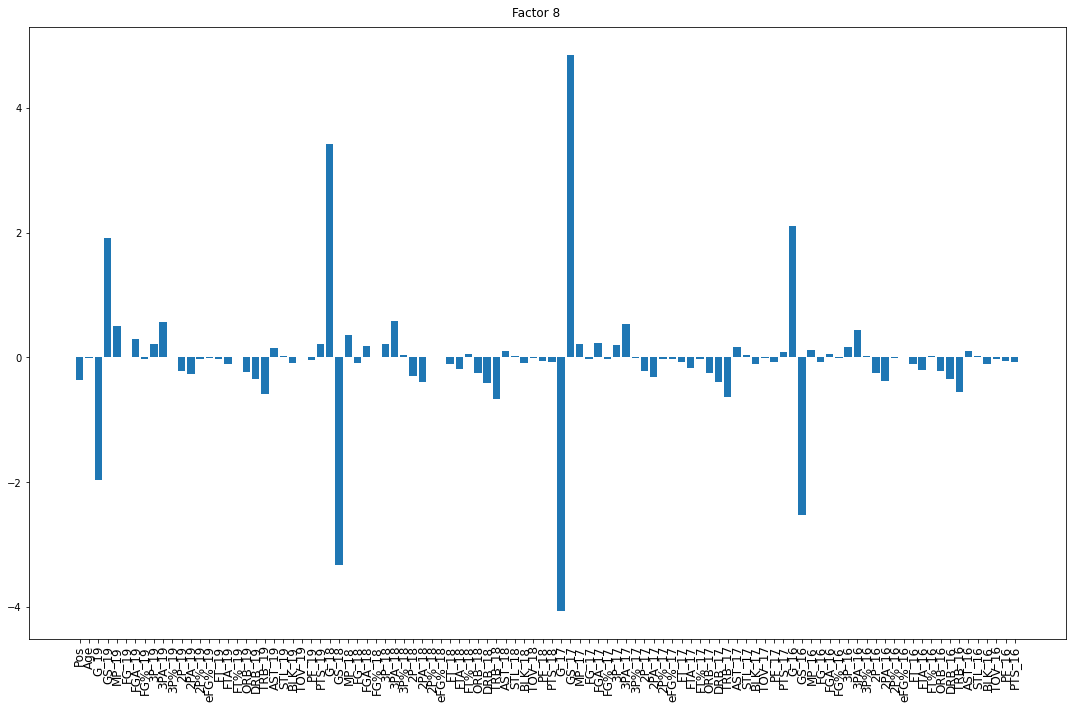

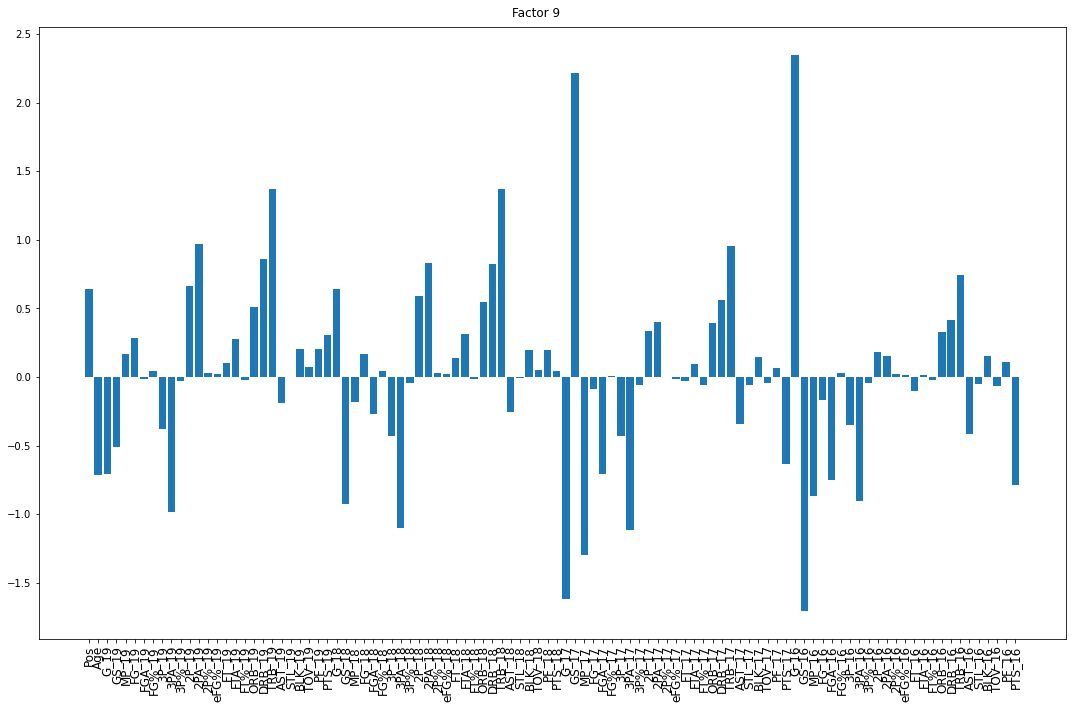

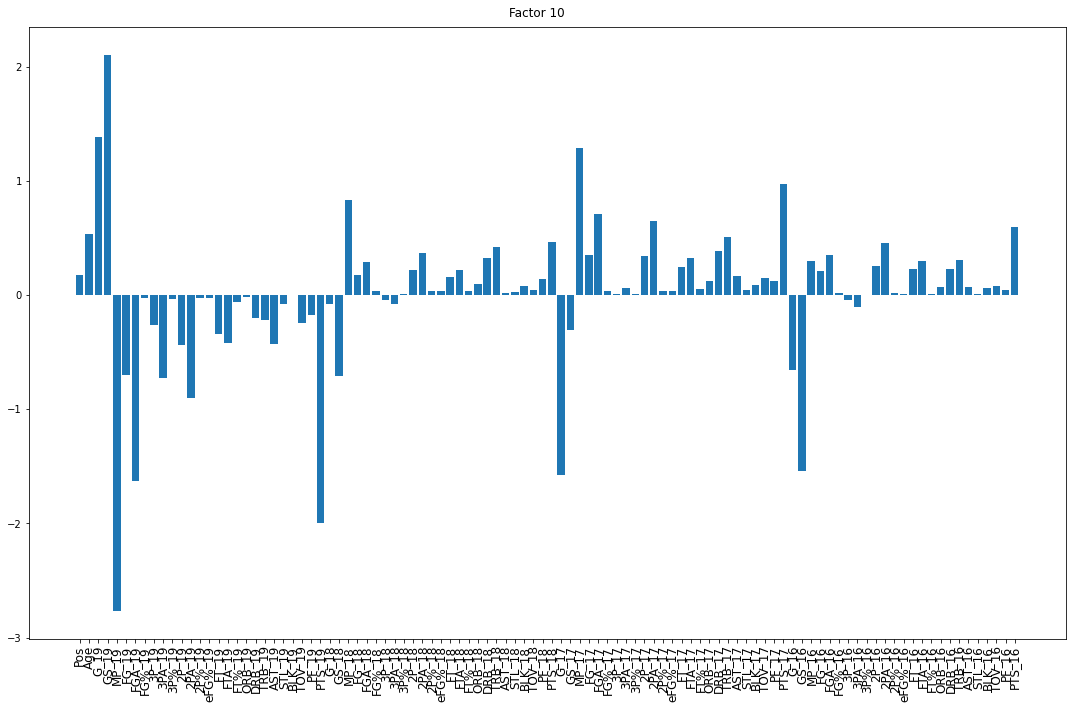

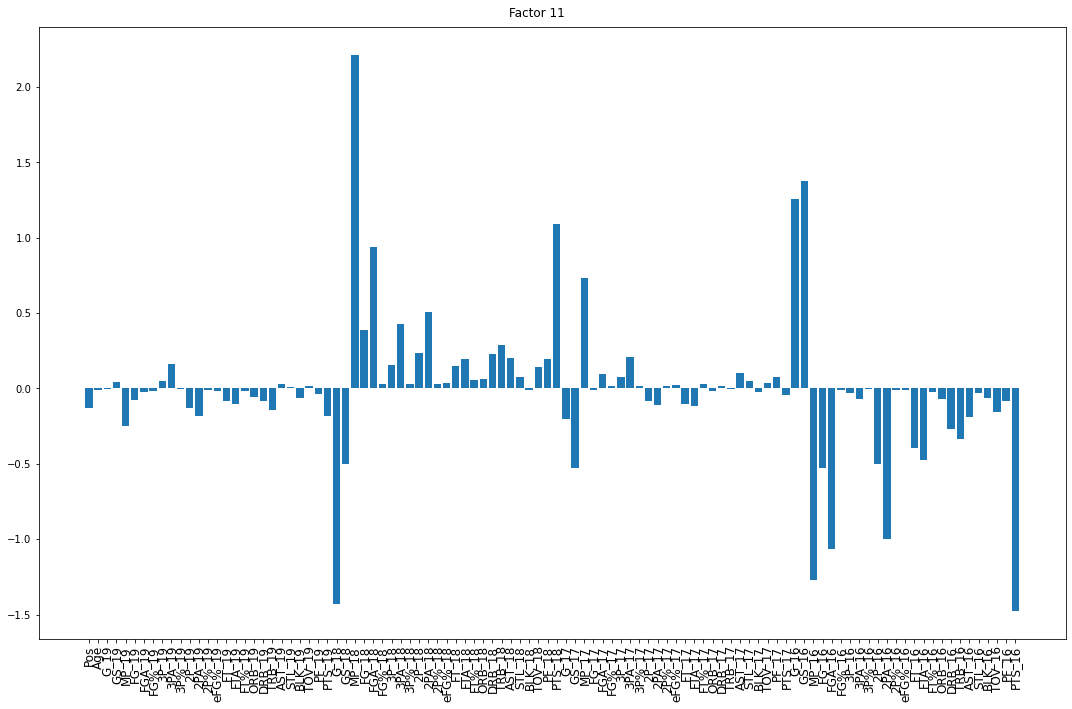

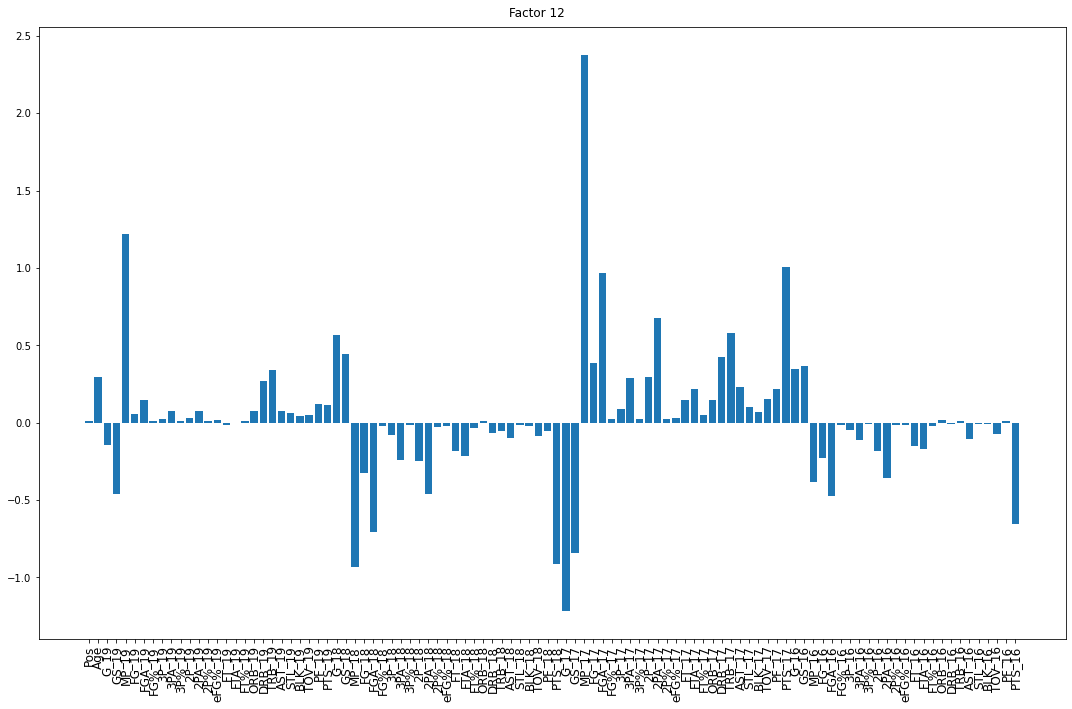

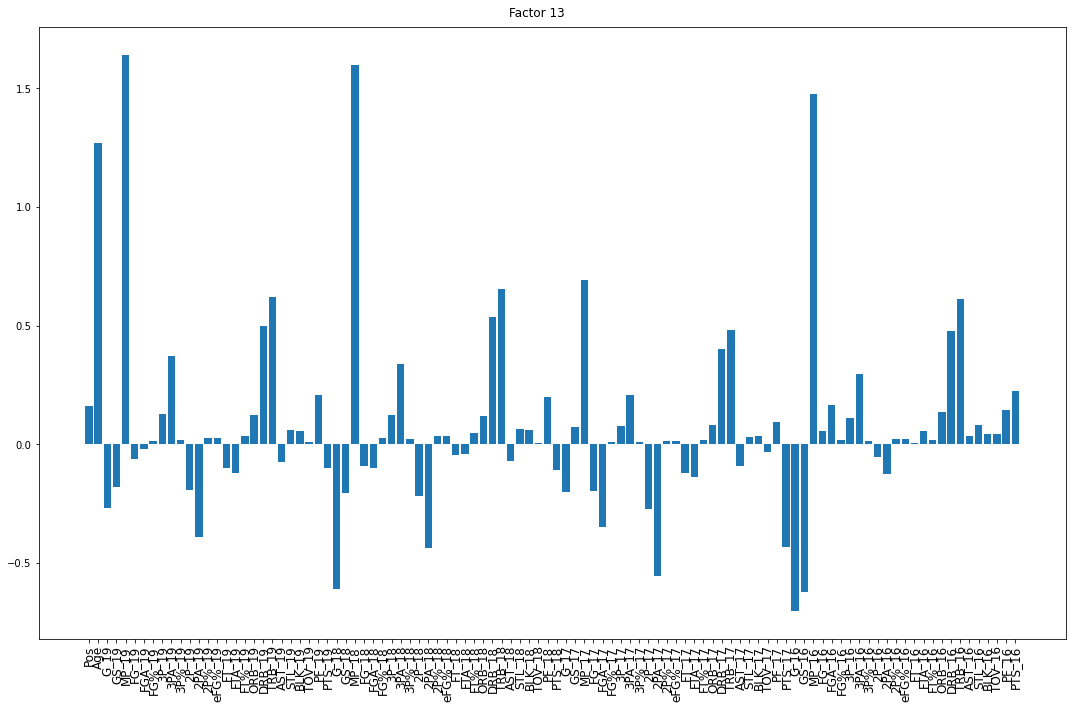

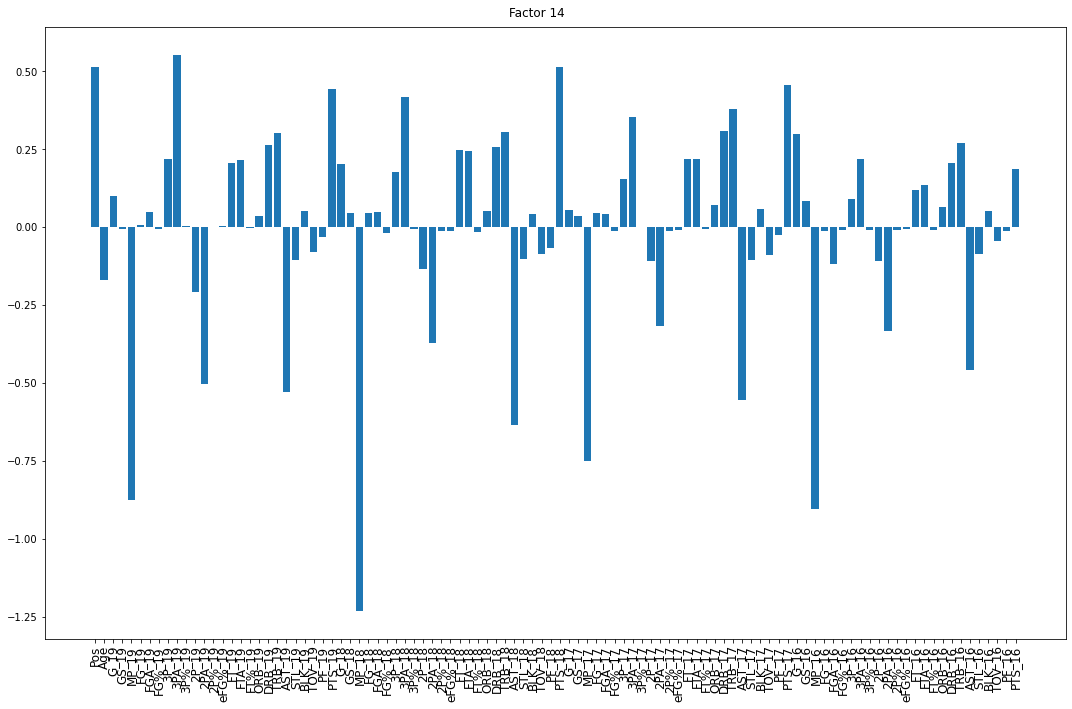

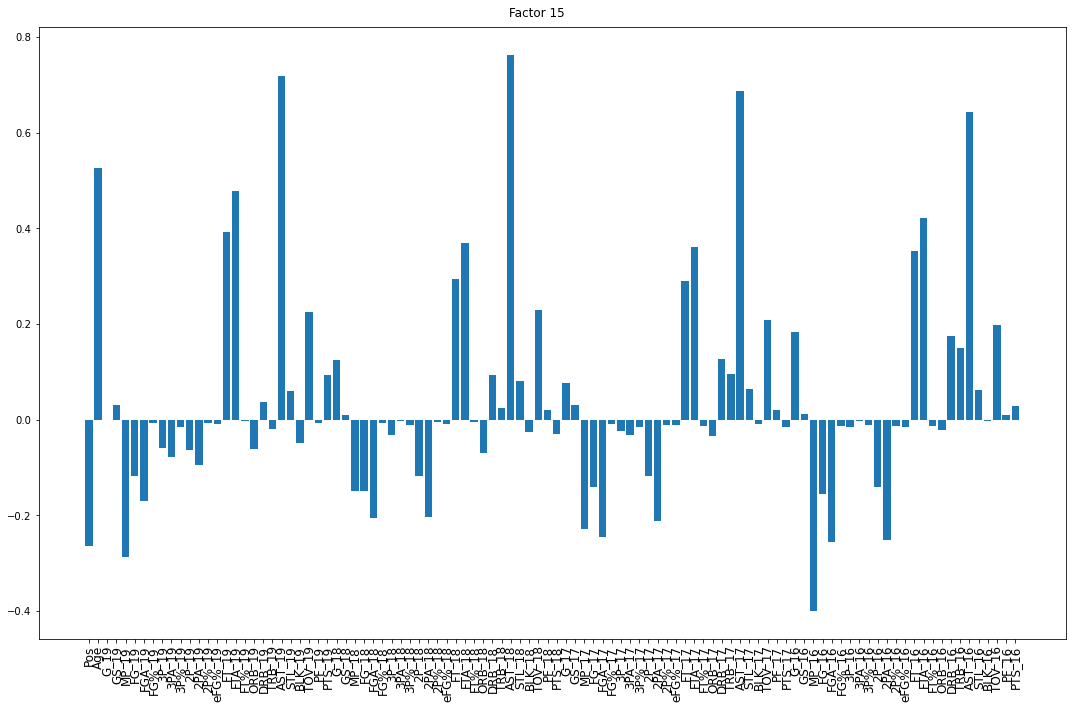

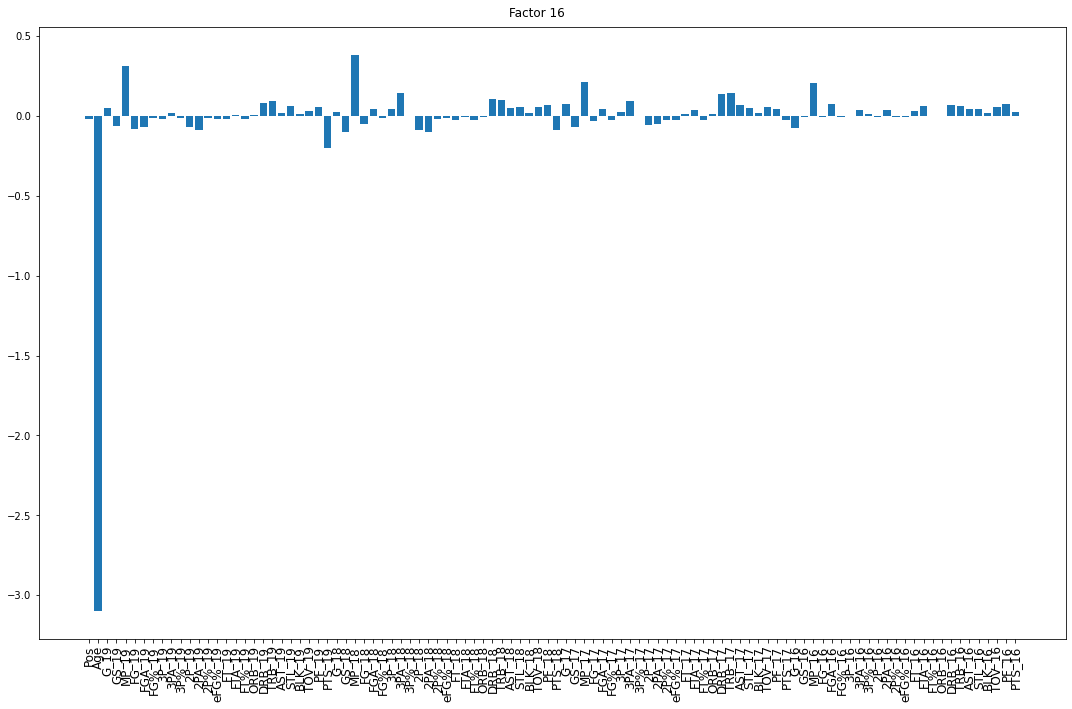

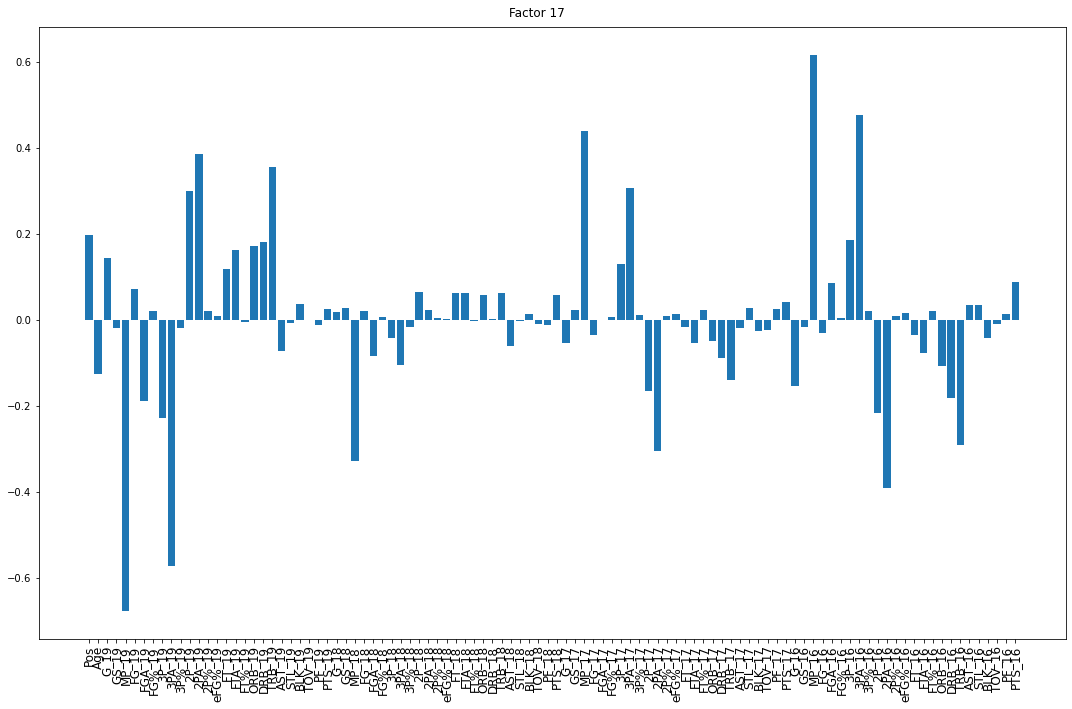

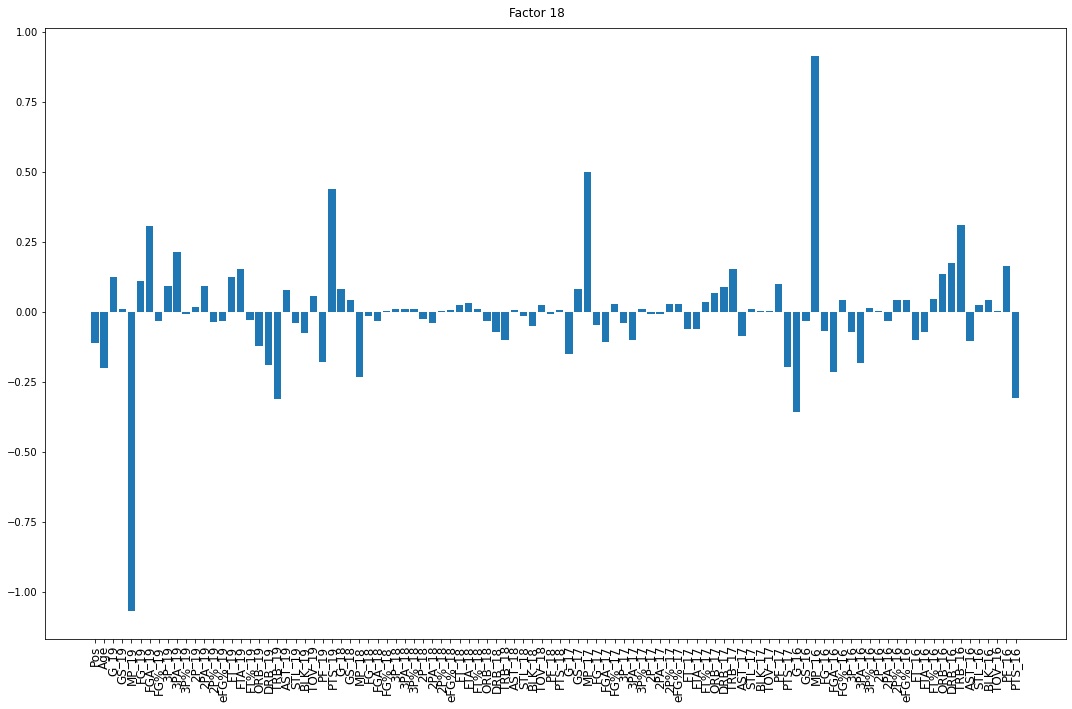

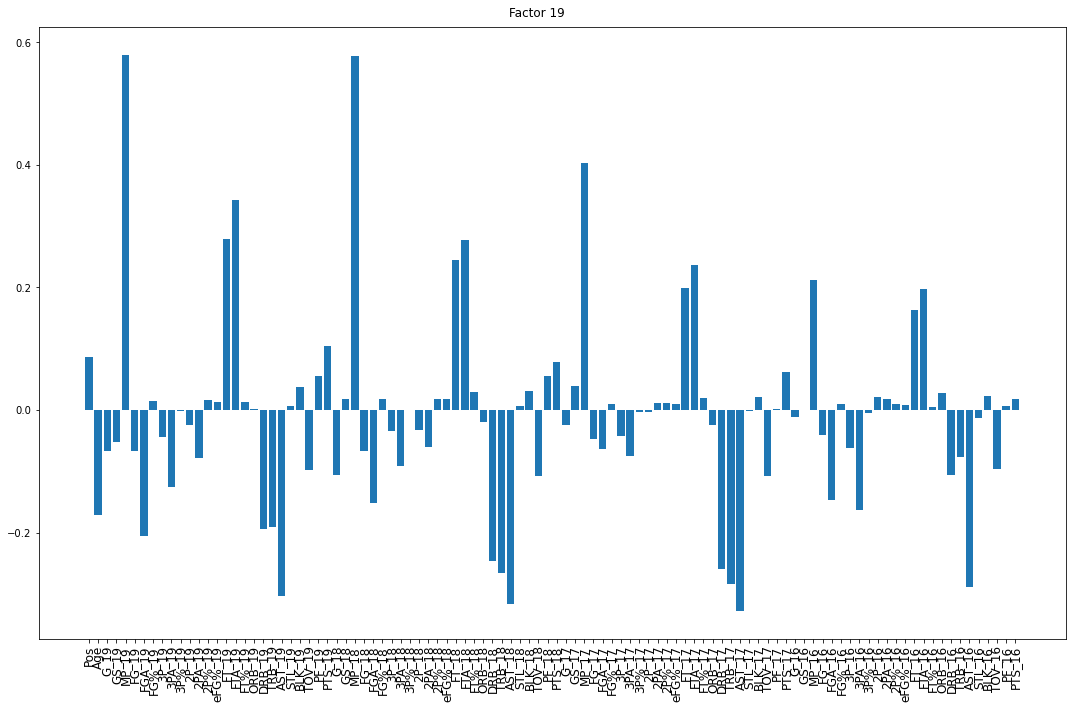

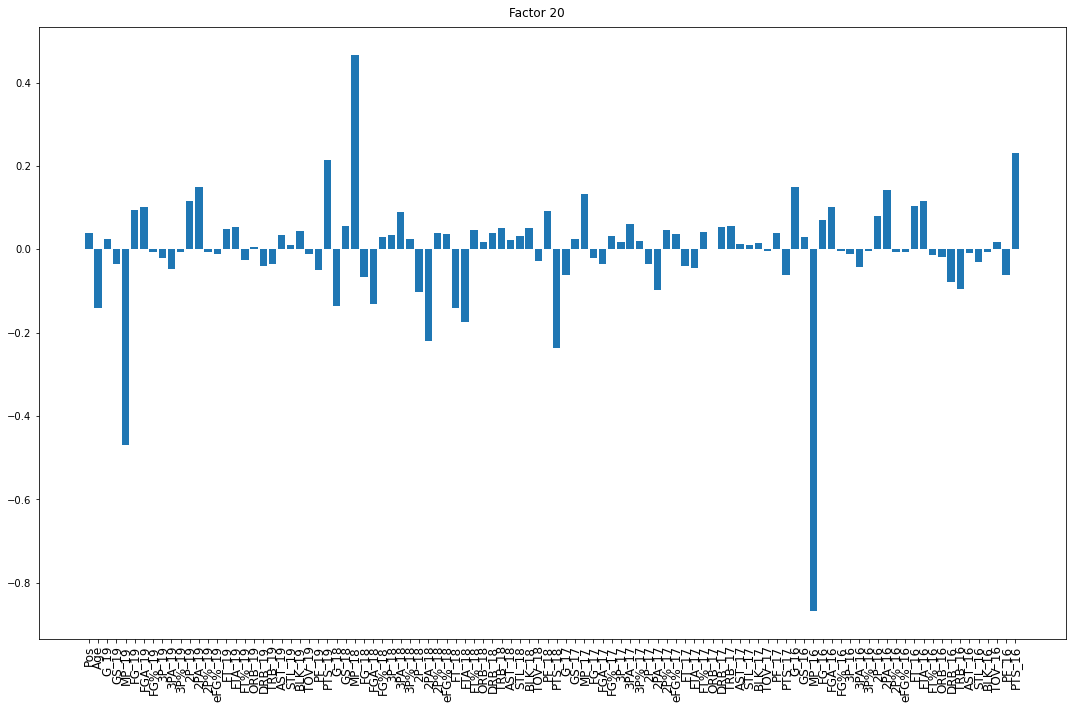

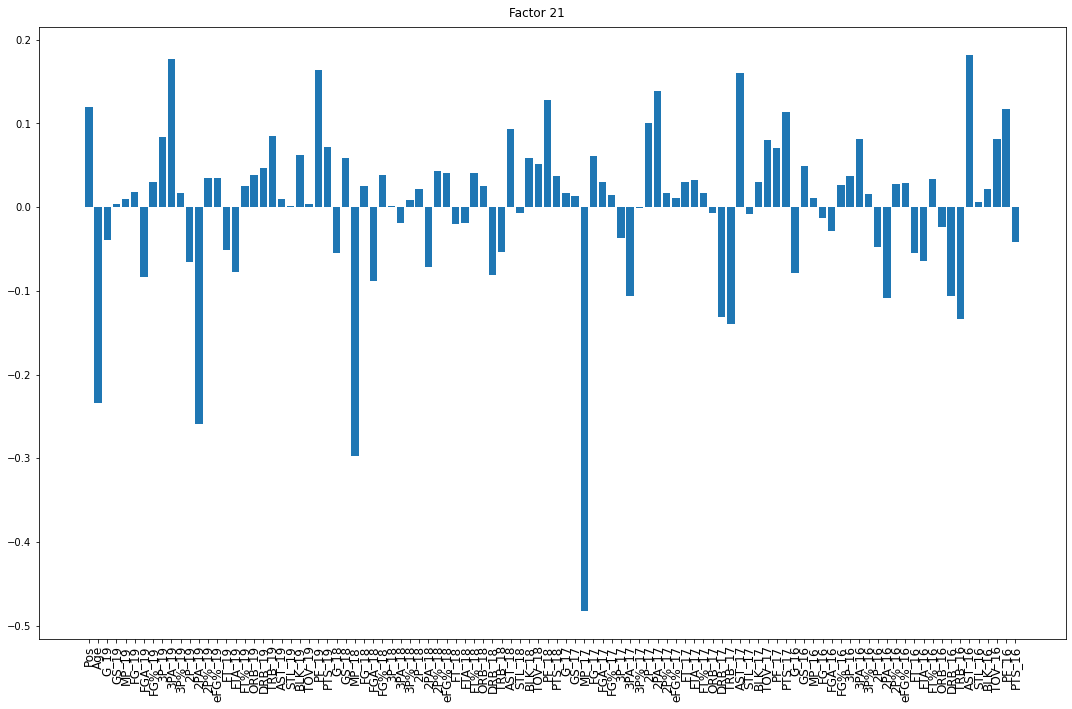

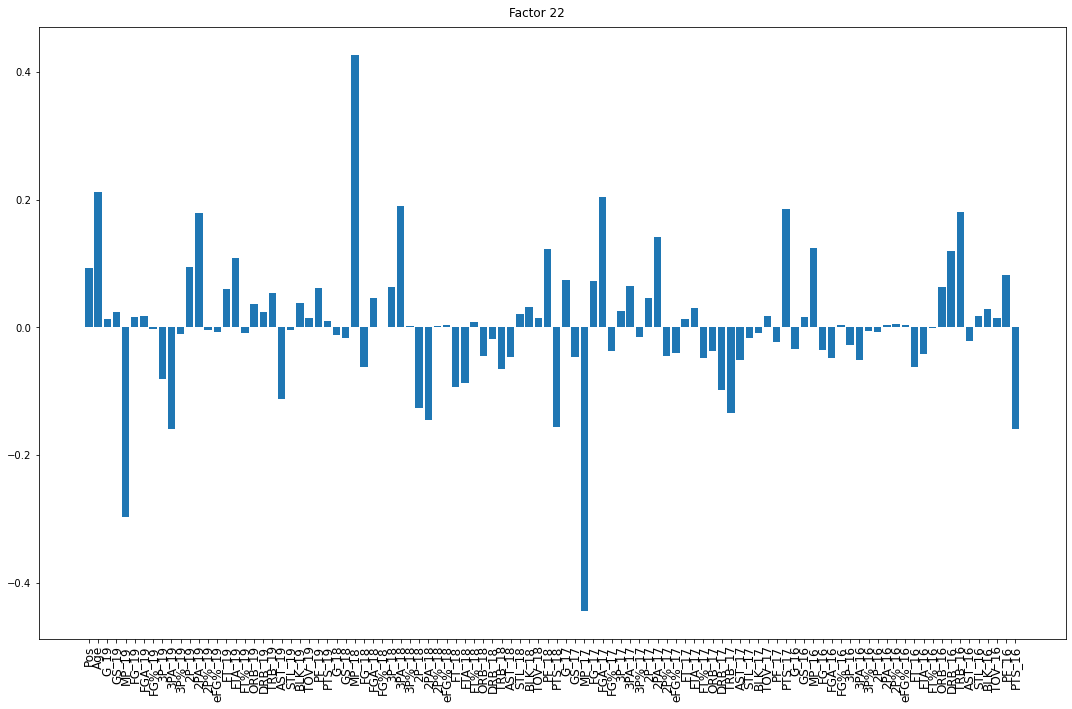

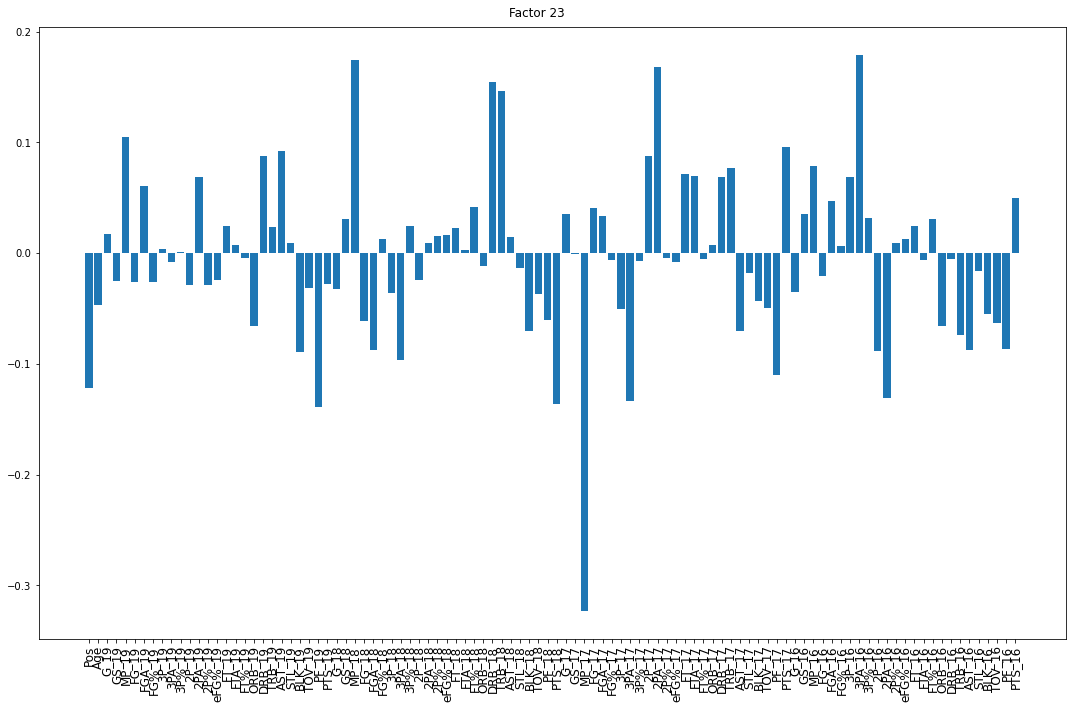

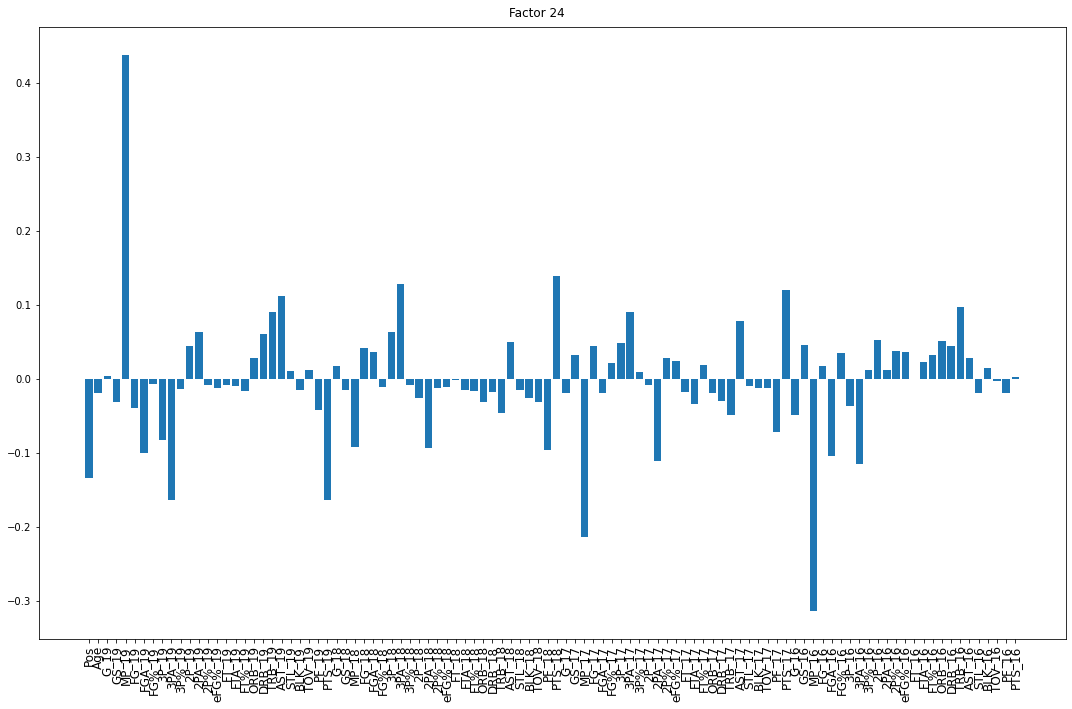

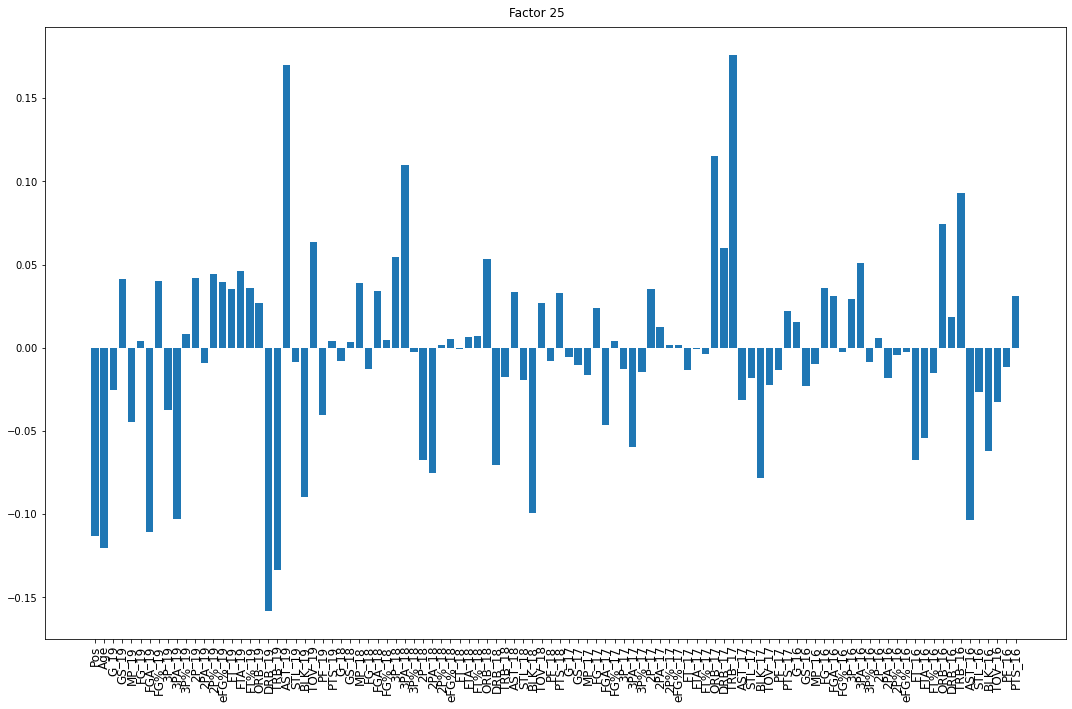

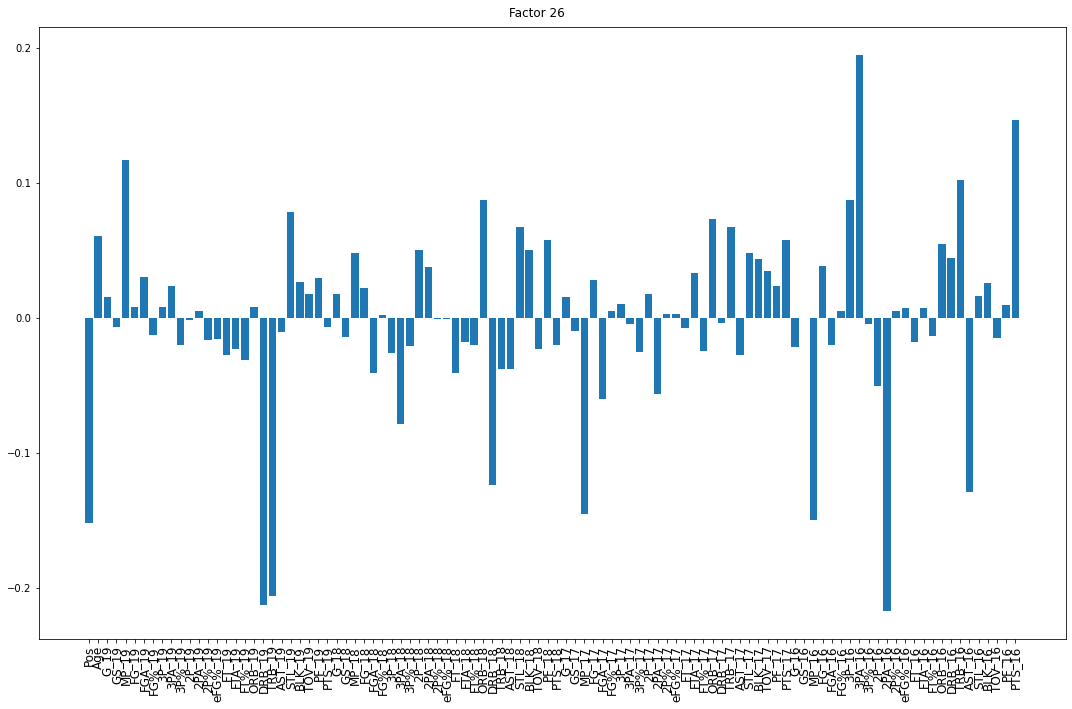

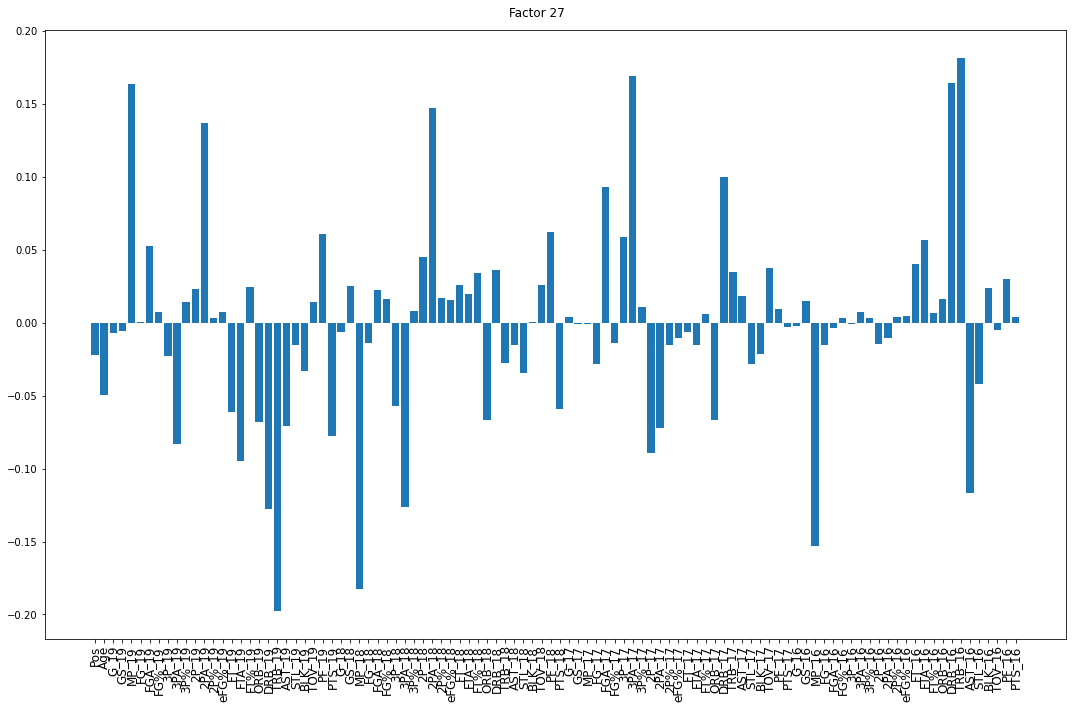

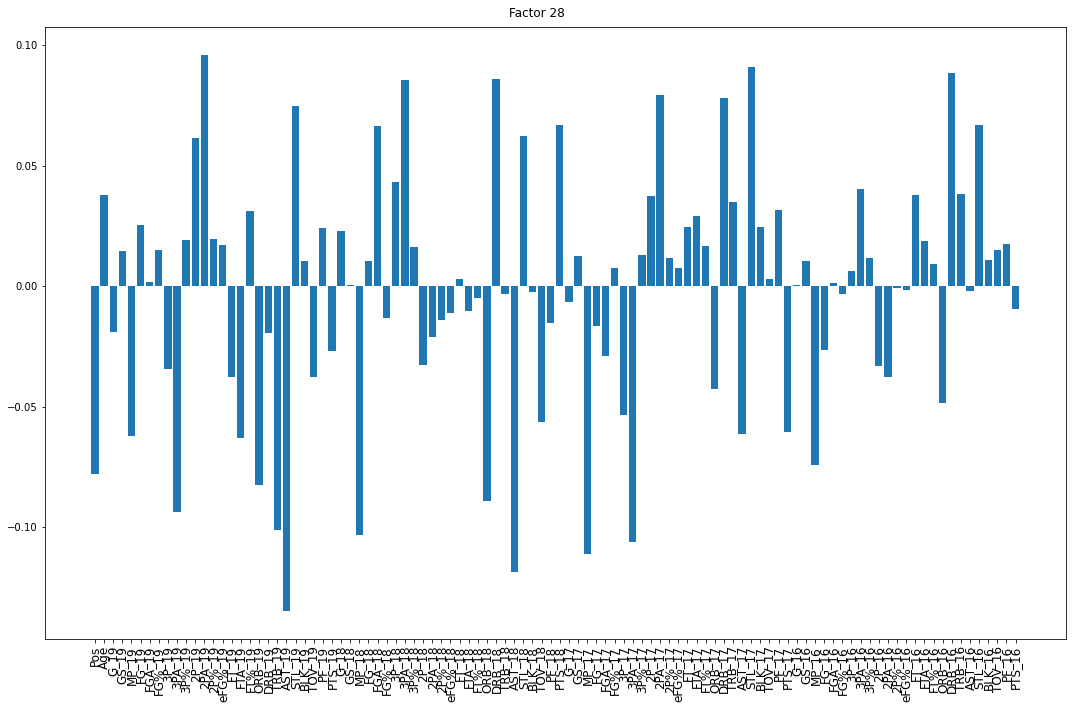

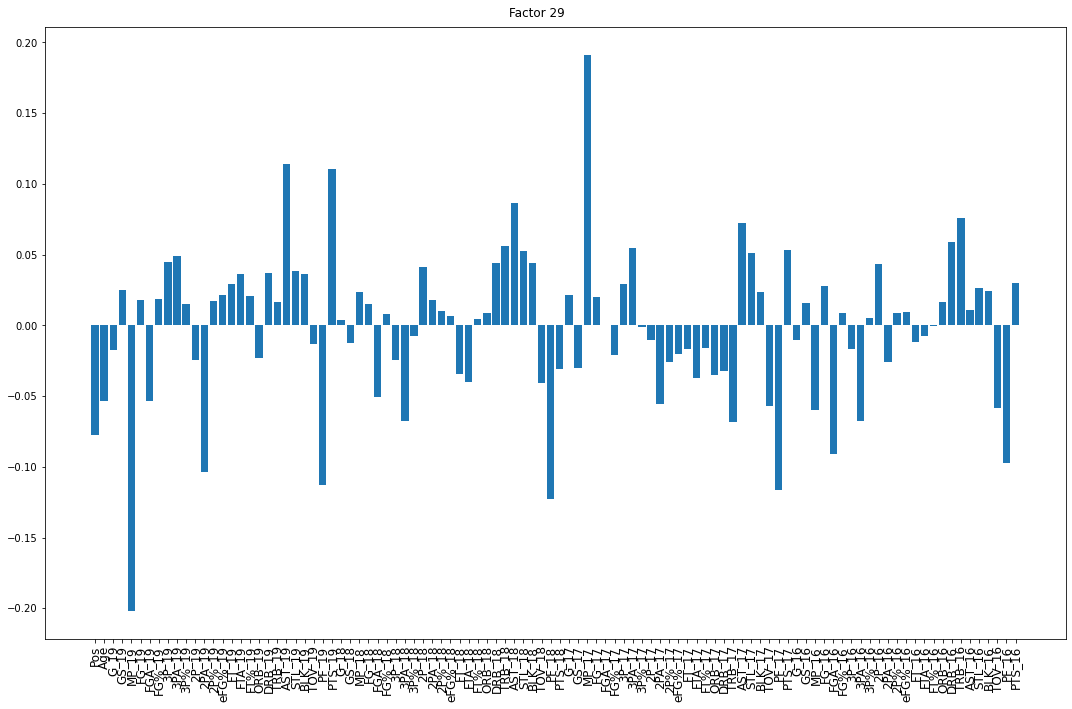

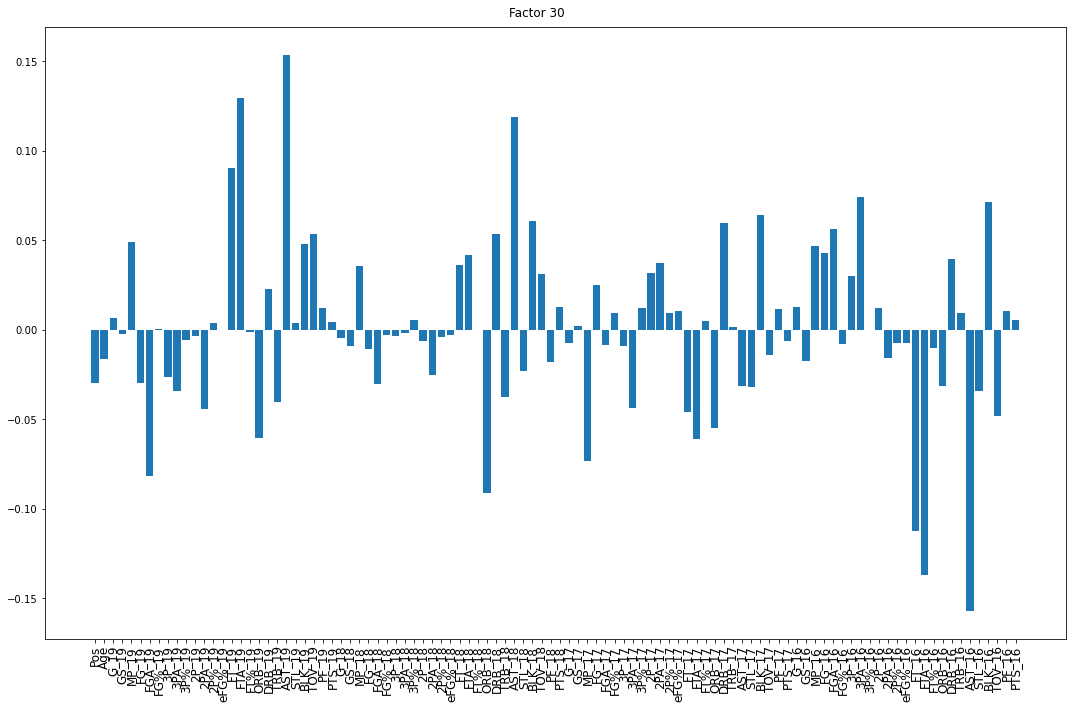

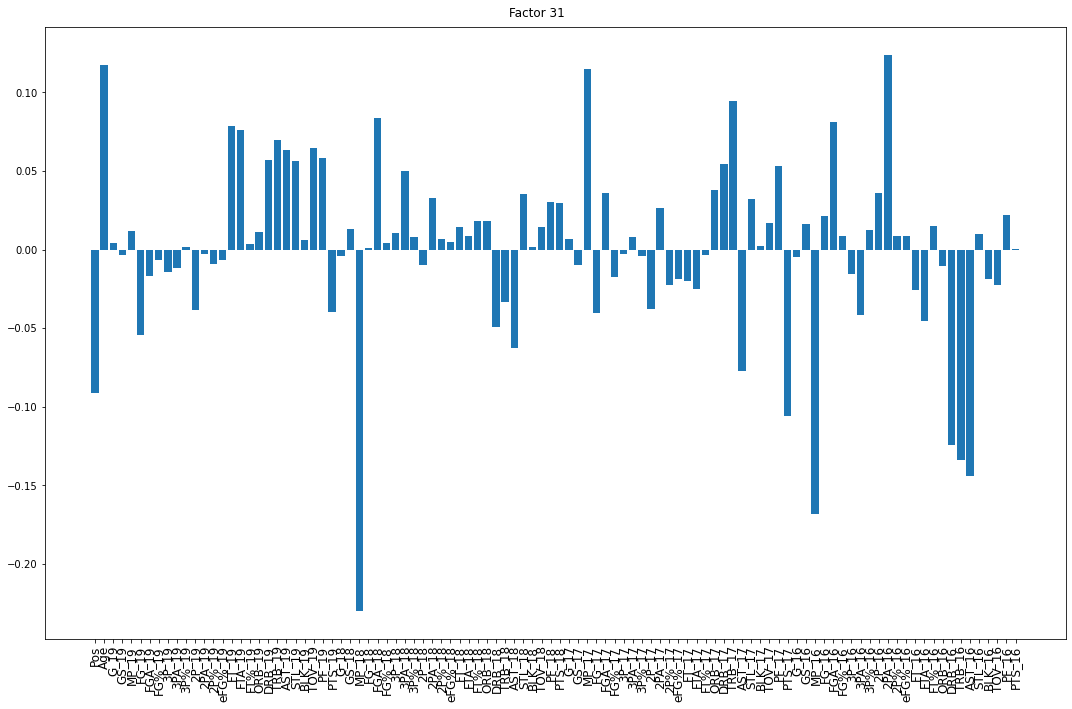

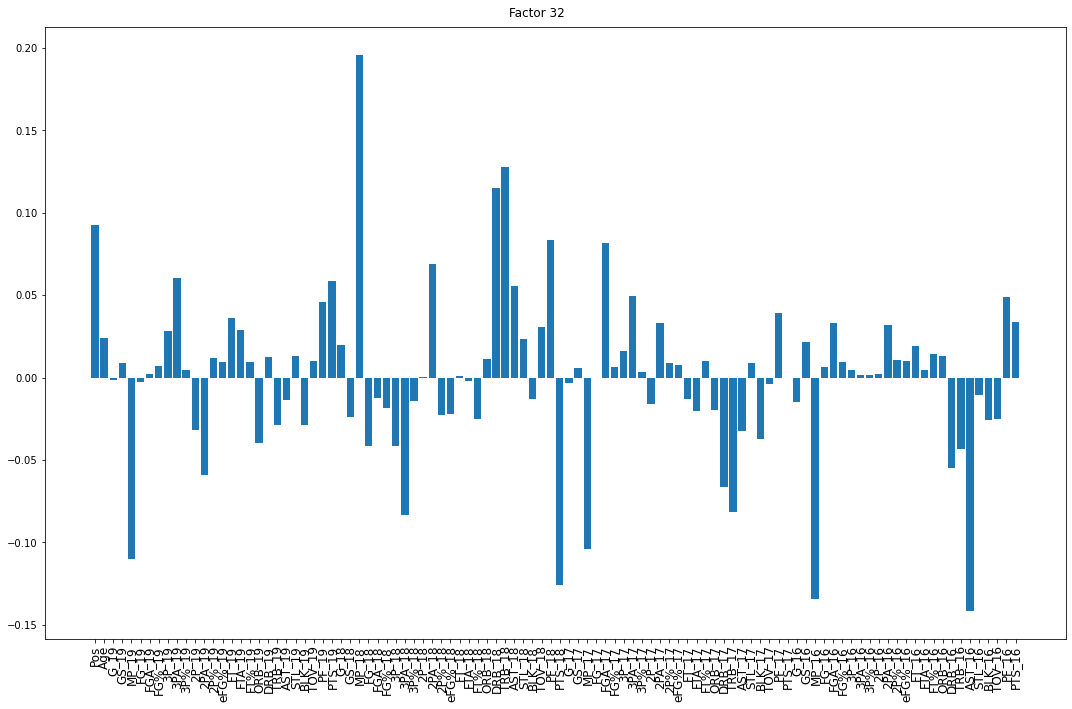

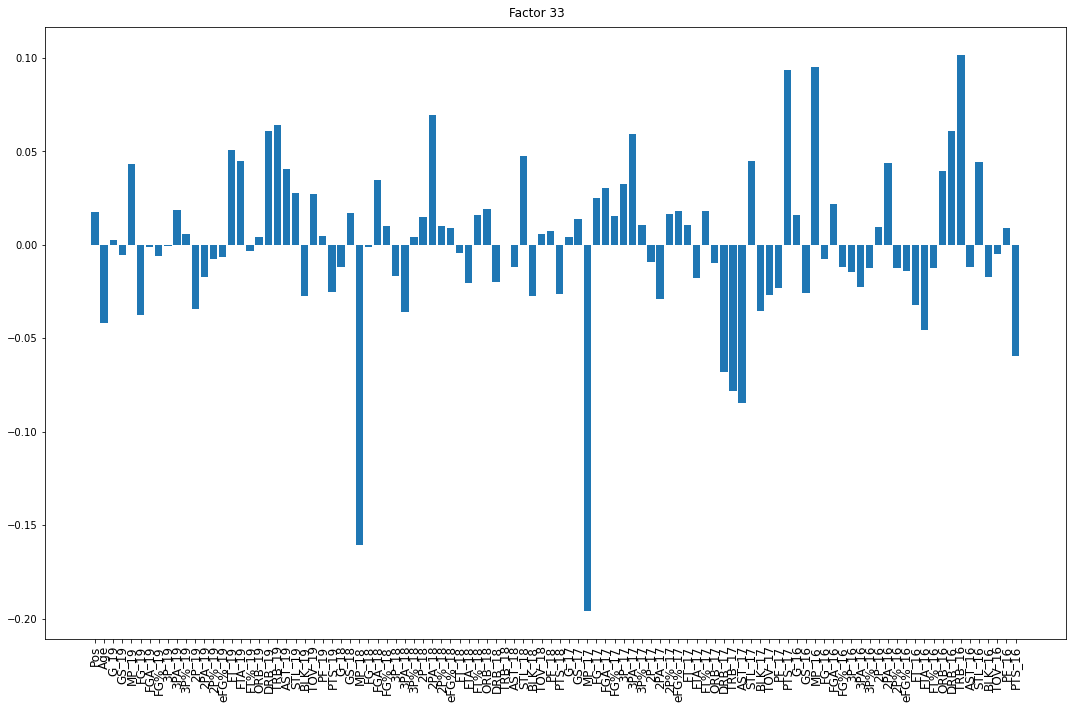

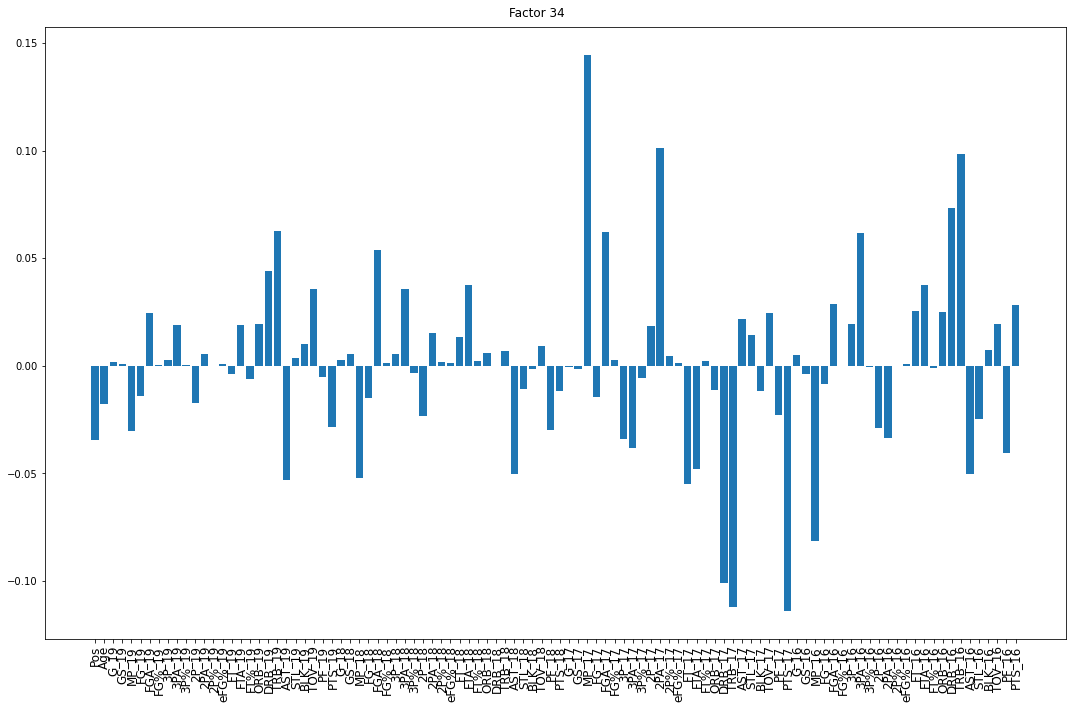

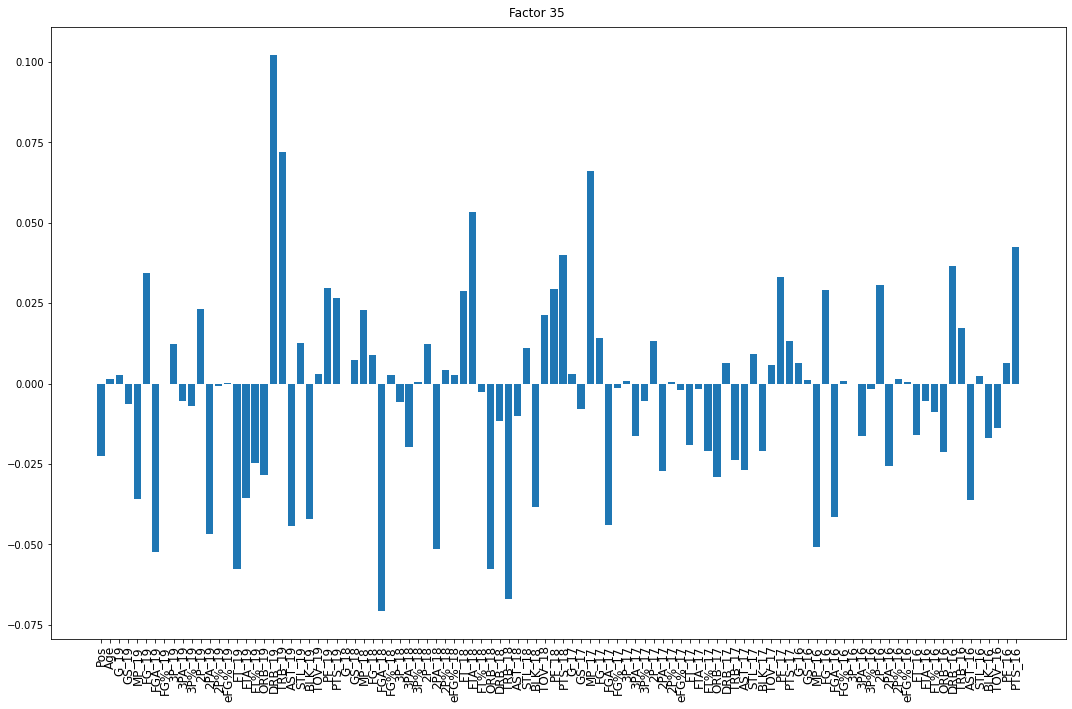

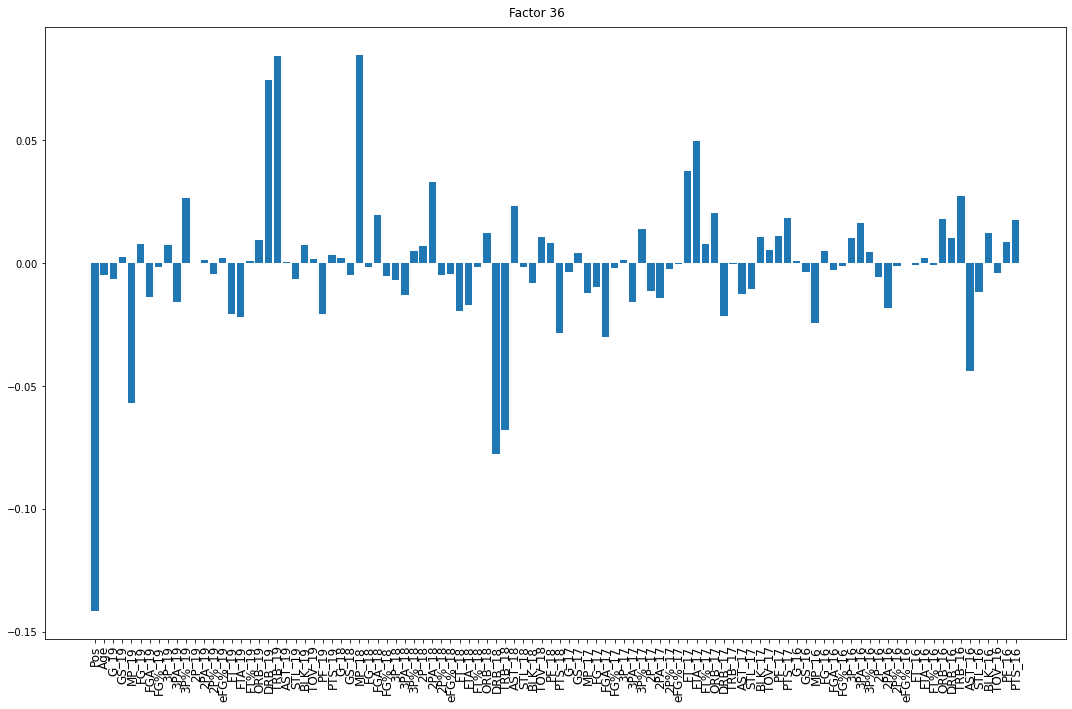

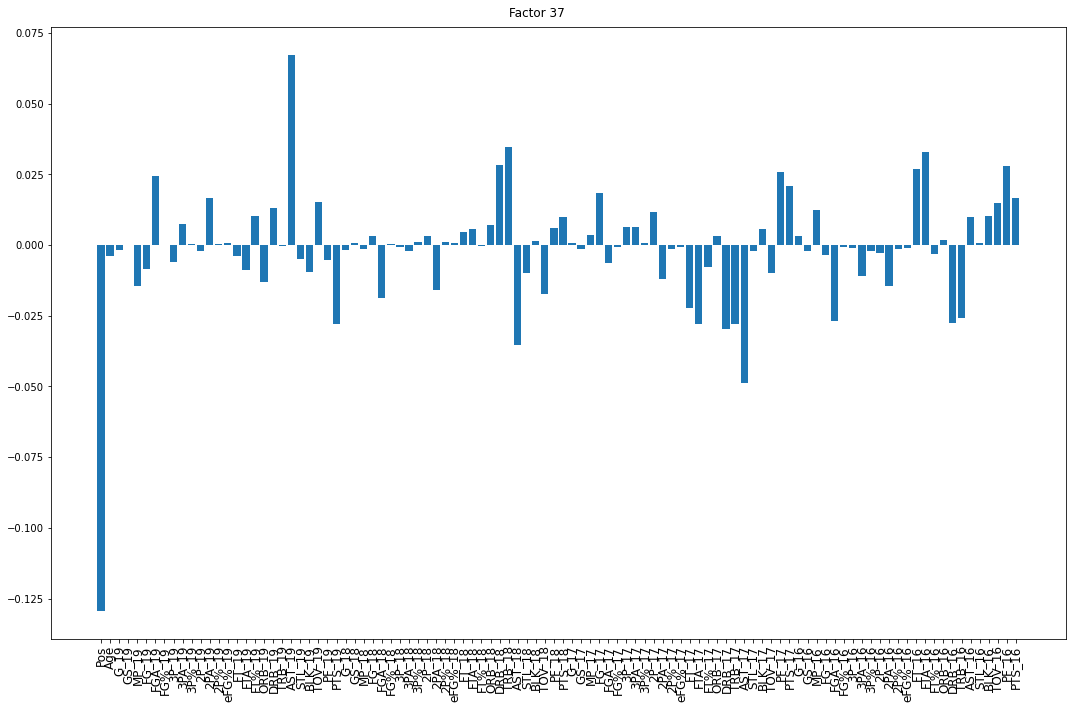

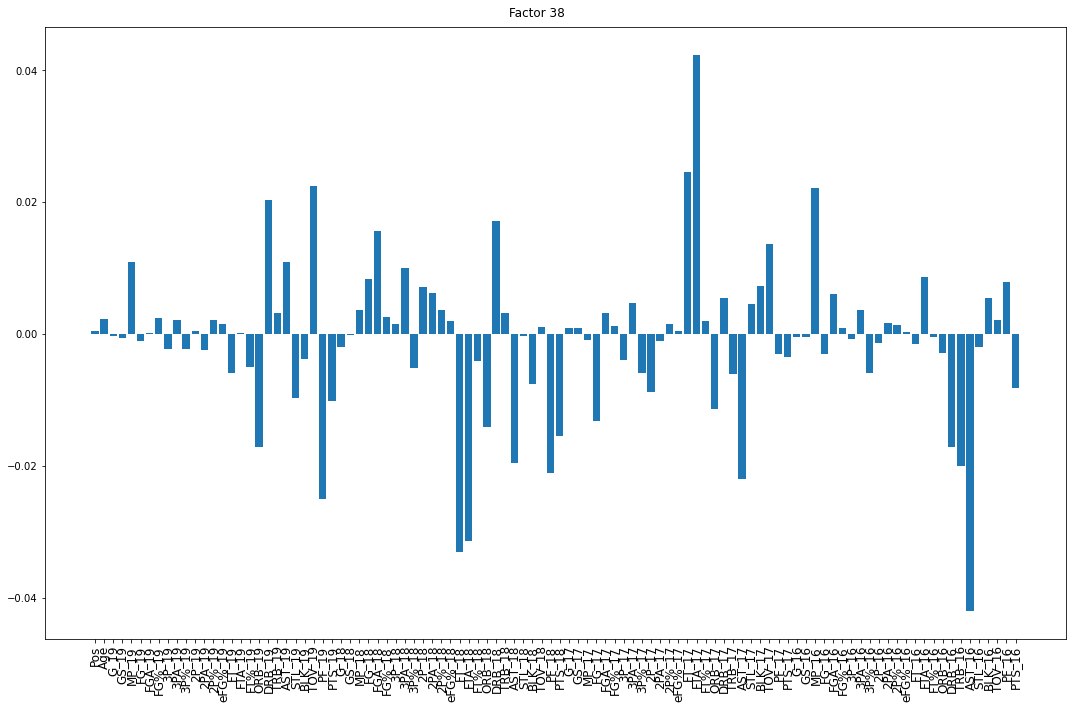

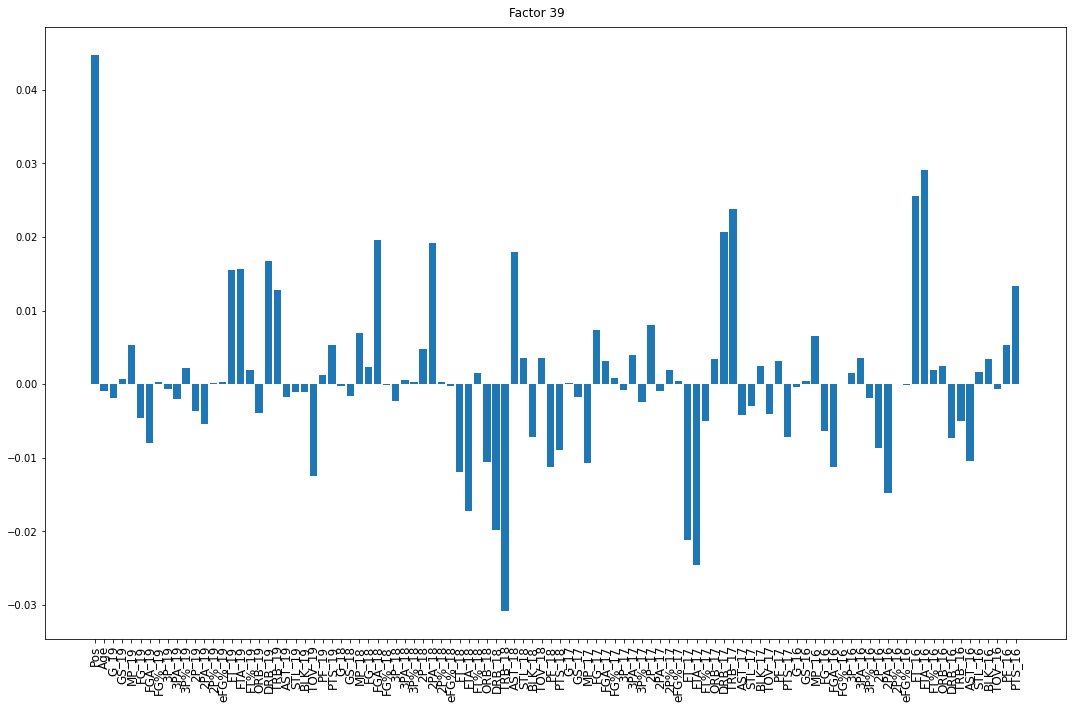

In [25]:
for i in range(len(fa_components)):
    plt.figure(figsize=(15, 10))
    plt.bar(fa_components.columns, fa_components.iloc[i])
    plt.suptitle(f'Factor {i}')
    plt.rc('xtick', labelsize=12)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()